<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_801-850.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [454]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [455]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

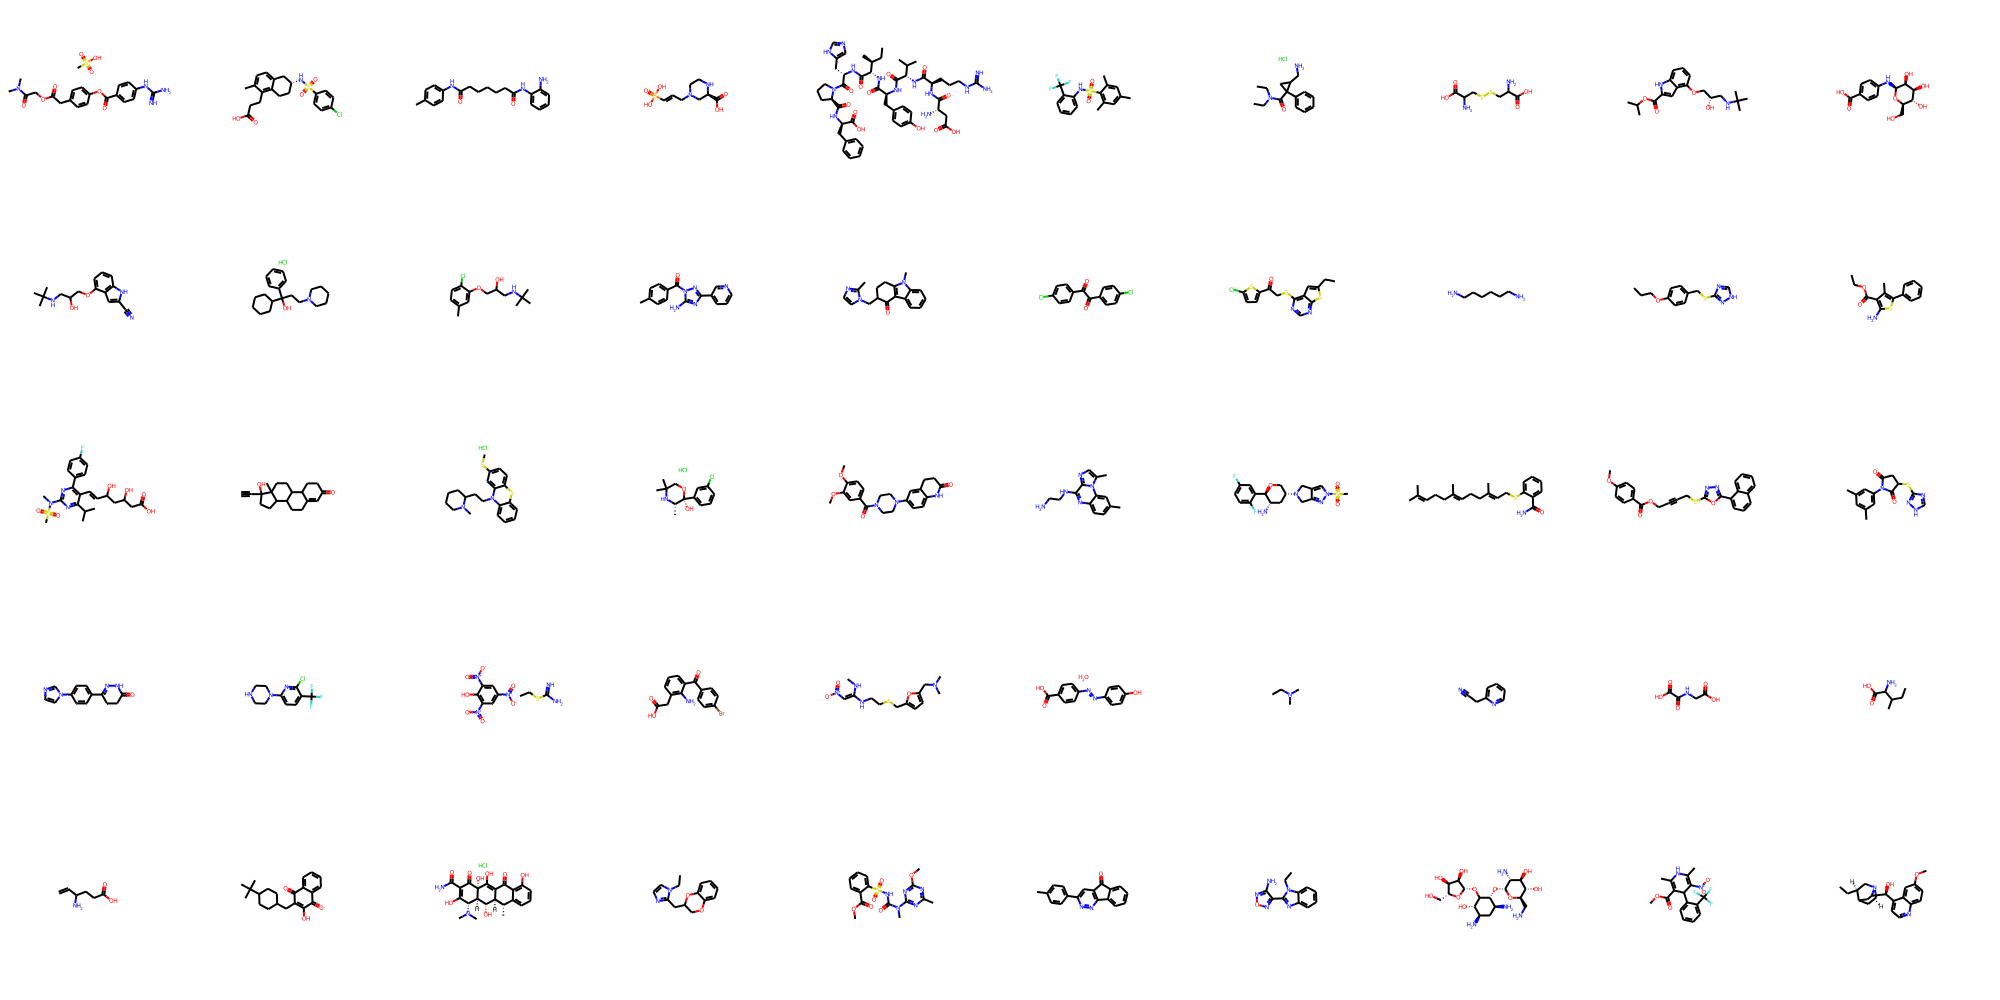

In [456]:
smiles_list = [

'CN(C)C(=O)COC(=O)Cc1ccc(OC(=O)c2ccc(NC(=N)N)cc2)cc1.CS(=O)(=O)O',
'Cc1ccc2c(c1CCC(=O)O)CC[C@@H](NS(=O)(=O)c1ccc(Cl)cc1)C2',
'Cc1ccc(NC(=O)CCCCCC(=O)Nc2ccccc2N)cc1',
'O=C(O)[C@H]1CN(C/C=C/P(=O)(O)O)CCN1',
'CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O)[C@@H](NC(=O)[C@@H](CCCNC(=N)N)NC(=O)[C@@H](N)CC(=O)O)C(C)C)C(=O)N[C@@H](Cc1cnc[nH]1)C(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1ccccc1)C(=O)O',
'Cc1cc(C)c(S(=O)(=O)Nc2ccccc2C(F)(F)F)c(C)c1',
'CCN(CC)C(=O)C1(c2ccccc2)CC1CN.Cl',
'NC(CSSCC(N)C(=O)O)C(=O)O',
'CC(C)OC(=O)c1cc2c(OC[C@@H](O)CNC(C)(C)C)cccc2[nH]1',
'O=C(O)c1ccc(N[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@@H]2O)cc1',
'CC(C)(C)NCC(O)COc1cccc2[nH]c(C#N)cc12',
'Cl.OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1',
'Cc1ccc(Cl)c(OCC(O)CNC(C)(C)C)c1',
'Cc1ccc(C(=O)n2nc(-c3cccnc3)nc2N)cc1',
'Cc1nccn1CC1CCc2c(c3ccccc3n2C)C1=O',
'O=C(C(=O)c1ccc(Cl)cc1)c1ccc(Cl)cc1',
'CCc1cc2c(SCC(=O)c3ccc(Cl)s3)ncnc2s1',
'NCCCCCCN',
'CCCOc1ccc(CSc2nc[nH]n2)cc1',
'CCOC(=O)c1c(N)sc(-c2ccccc2)c1C',
'CC(C)c1nc(N(C)S(C)(=O)=O)nc(-c2ccc(F)cc2)c1/C=C/C(O)CC(O)CC(=O)O',
'C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C',
'CSc1ccc2c(c1)N(CCC1CCCCN1C)c1ccccc1S2.Cl',
'C[C@@H]1NC(C)(C)CO[C@@]1(O)c1cccc(Cl)c1.Cl',
'COc1ccc(C(=O)N2CCN(c3ccc4c(c3)CCC(=O)N4)CC2)cc1OC',
'Cc1ccc2nc(NCCN)c3ncc(C)n3c2c1',
'CS(=O)(=O)n1cc2c(n1)CN([C@H]1CO[C@H](c3cc(F)ccc3F)[C@@H](N)C1)C2',
'CC(C)=CCC/C(C)=C/CC/C(C)=C/CSc1ccccc1C(N)=O',
'COc1ccc(C(=O)OCC#CCSc2nnc(-c3cccc4ccccc34)o2)cc1',
'Cc1cc(C)cc(N2C(=O)CC(Sc3nc[nH]n3)C2=O)c1',
'O=C1CCC(c2ccc(-n3ccnc3)cc2)=NN1',
'FC(F)(F)c1ccc(N2CCNCC2)nc1Cl',
'CCSC(=N)N.O=[N+]([O-])c1cc([N+](=O)[O-])c(O)c([N+](=O)[O-])c1',
'Nc1c(CC(=O)O)cccc1C(=O)c1ccc(Br)cc1',
'CNC(=C[N+](=O)[O-])NCCSCc1ccc(CN(C)C)o1',
'O.O=C(O)c1ccc(/N=N/c2ccc(O)cc2)cc1',
'CCN(C)C',
'N#CCc1ccccn1',
'O=C(O)CNC(=O)C(=O)O',
'CCC(C)C(N)C(=O)O',
'C=CC(N)CCC(=O)O',
'CC(C)(C)C1CCC(CC2=C(O)C(=O)c3ccccc3C2=O)CC1',
'C[C@H]1c2cccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(C(N)=O)=C(O)[C@@H](N(C)C)[C@@H]3[C@@H](O)[C@@H]21.Cl',
'CCn1ccnc1CC1COc2ccccc2O1',
'COC(=O)c1ccccc1S(=O)(=O)NC(=O)N(C)c1nc(C)nc(OC)n1',
'Cc1ccc(-c2cc3c(nn2)-c2ccccc2C3=O)cc1',
'CCn1c(-c2nonc2N)nc2ccccc21',
'NC[C@H]1O[C@H](O[C@H]2C(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H]3O)[C@@H](O)[C@H](N)C[C@@H]2N)[C@H](N)[C@@H](O)[C@@H]1O',
'COC(=O)C1=C(C)NC(C)=C([N+](=O)[O-])C1c1ccccc1C(F)(F)F',
'CC[C@H]1CN2CCC1C[C@@H]2[C@@H](O)c1ccnc2ccc(OC)cc12',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



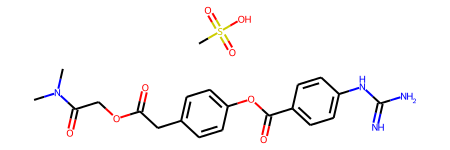

In [457]:
M1 = mol_list [0]
M1

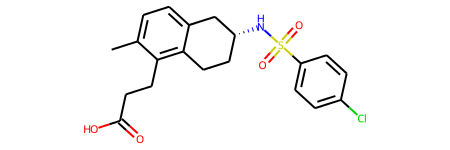

In [458]:
M2 = mol_list [1]
M2

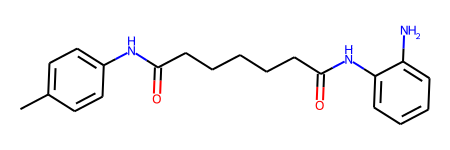

In [459]:
M3 = mol_list [2]
M3

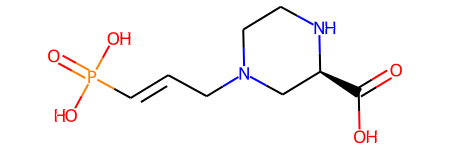

In [460]:
M4 = mol_list [3]
M4

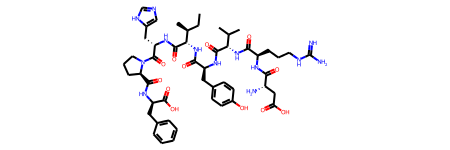

In [461]:
M5 = mol_list [4]
M5

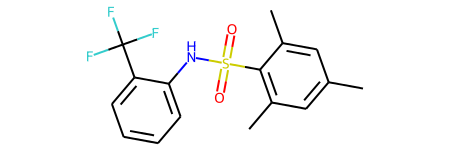

In [462]:
M6 = mol_list [5]
M6

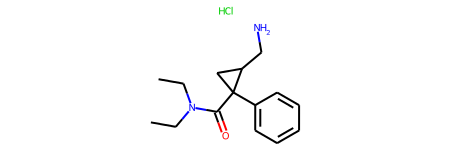

In [463]:
M7 = mol_list [6]
M7

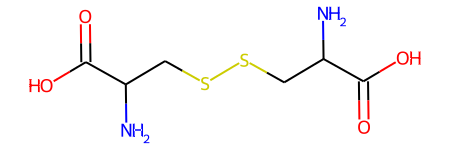

In [464]:
M8 = mol_list [7]
M8

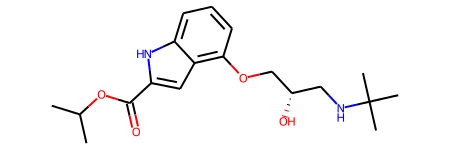

In [465]:
M9 = mol_list [8]
M9

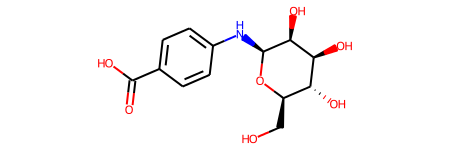

In [466]:
M10 = mol_list [9]
M10

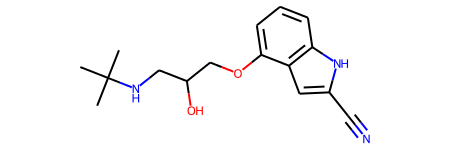

In [467]:
M11 = mol_list [10]
M11

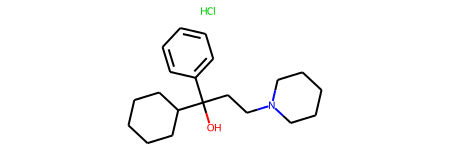

In [468]:
M12 = mol_list [11]
M12

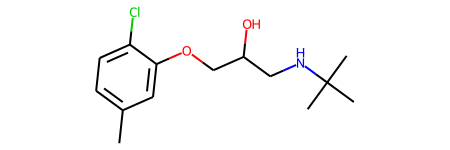

In [469]:
M13 = mol_list [12]
M13

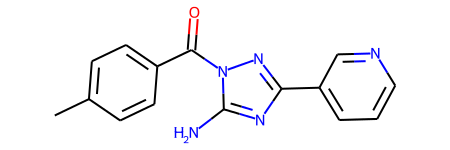

In [470]:
M14 = mol_list [13]
M14

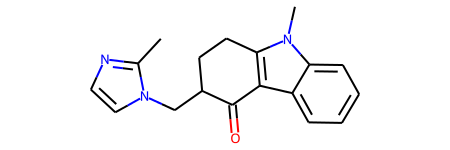

In [471]:
M15 = mol_list [14]
M15

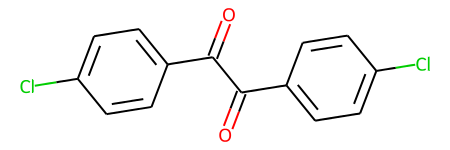

In [472]:
M16 = mol_list [15]
M16

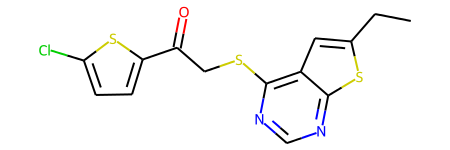

In [473]:
M17 = mol_list [16]
M17

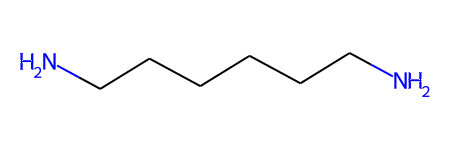

In [474]:
M18 = mol_list [17]
M18

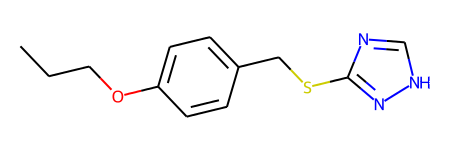

In [475]:
M19 = mol_list [18]
M19

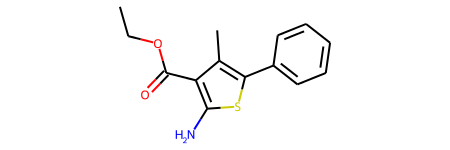

In [476]:
M20 = mol_list [19]
M20

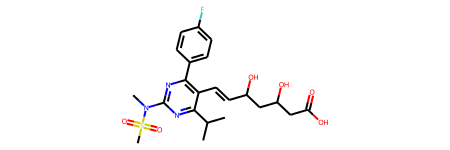

In [477]:
M21 = mol_list [20]
M21

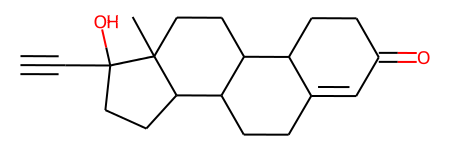

In [478]:
M22 = mol_list [21]
M22

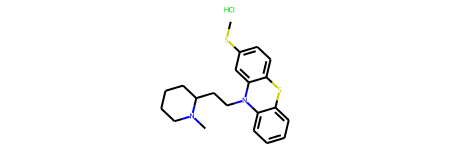

In [479]:
M23 = mol_list [22]
M23

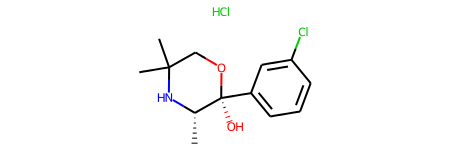

In [480]:
M24 = mol_list [23]
M24

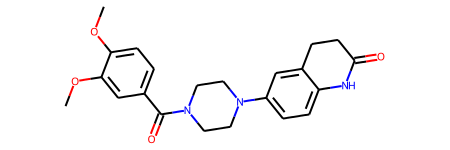

In [481]:
M25 = mol_list [24]
M25

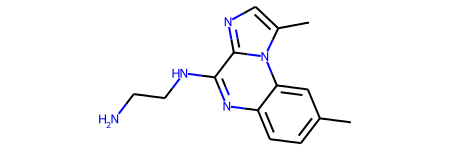

In [482]:
M26 = mol_list [25]
M26

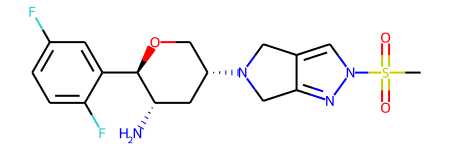

In [483]:
M27 = mol_list [26]
M27

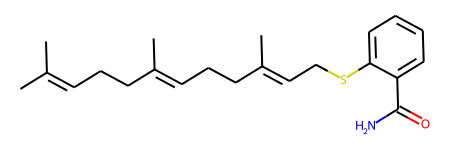

In [484]:
M28 = mol_list [27]
M28

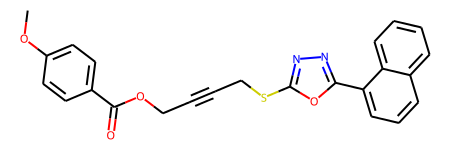

In [485]:
M29 = mol_list [28]
M29

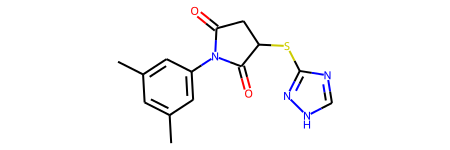

In [486]:
M30 = mol_list [29]
M30

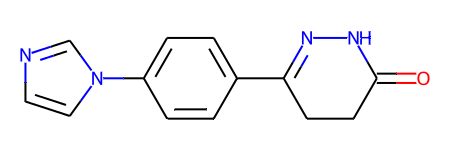

In [487]:
M31 = mol_list [30]
M31

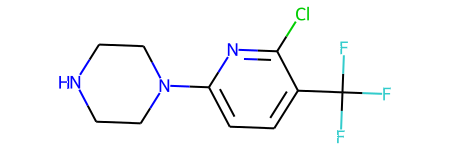

In [488]:
M32 = mol_list [31]
M32

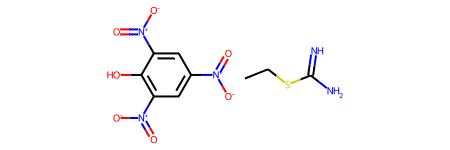

In [489]:
M33 = mol_list [32]
M33

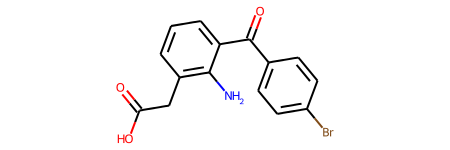

In [490]:
M34 = mol_list [33]
M34

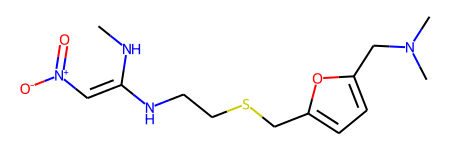

In [491]:
M35 = mol_list [34]
M35

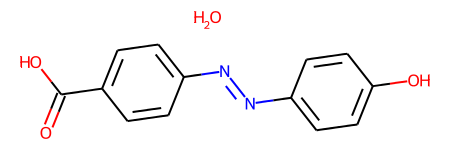

In [492]:
M36 = mol_list [35]
M36

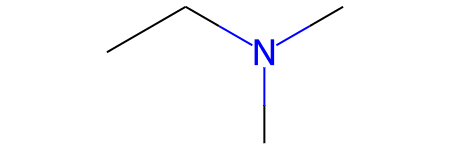

In [493]:
M37= mol_list [36]
M37

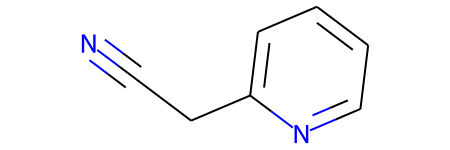

In [494]:
M38= mol_list [37]
M38

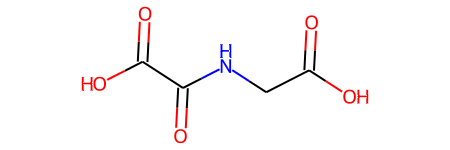

In [495]:
M39= mol_list [38]
M39

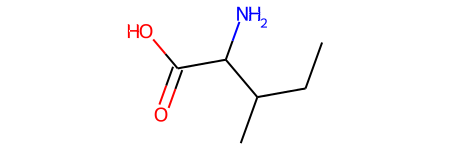

In [496]:
M40= mol_list [39]
M40

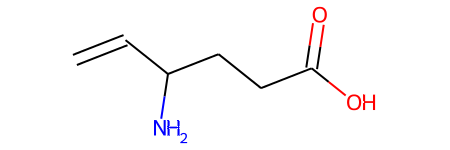

In [497]:
M41= mol_list [40]
M41

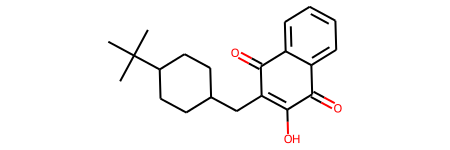

In [498]:
M42= mol_list [41]
M42

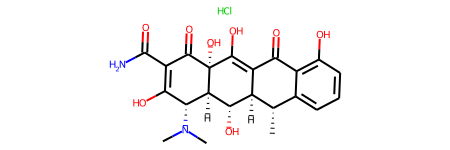

In [499]:
M43= mol_list [42]
M43

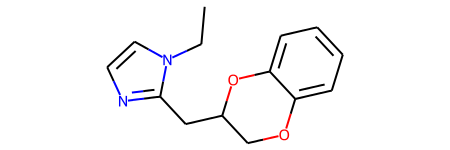

In [500]:
M44= mol_list [43]
M44

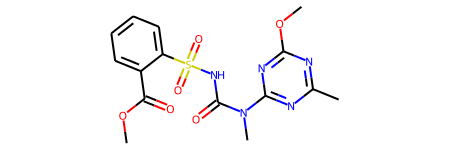

In [501]:
M45= mol_list [44]
M45

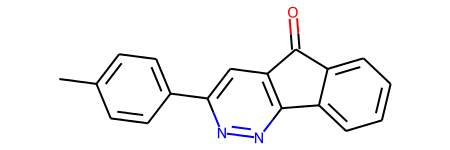

In [502]:
M46= mol_list [45]
M46

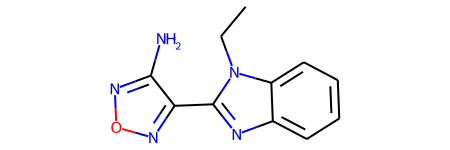

In [503]:
M47= mol_list [46]
M47

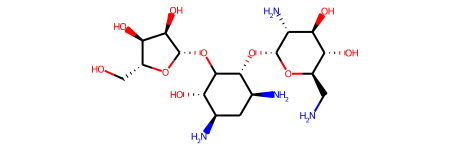

In [504]:
M48= mol_list [47]
M48

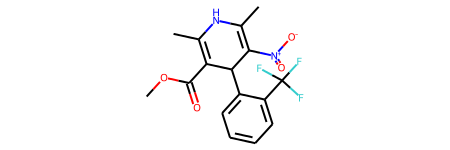

In [505]:
M49= mol_list [48]
M49

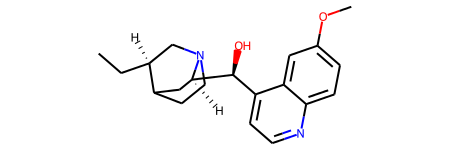

In [506]:
M50= mol_list [49]
M50

In [507]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[33,
 53,
 80,
 128,
 139,
 140,
 145,
 147,
 152,
 191,
 212,
 214,
 233,
 264,
 310,
 322,
 325,
 350,
 356,
 361,
 362,
 376,
 422,
 427,
 438,
 452,
 487,
 592,
 606,
 623,
 629,
 650,
 673,
 692,
 695,
 705,
 718,
 726,
 730,
 792,
 807,
 843,
 849,
 866,
 881,
 893,
 913,
 933,
 980,
 1007]

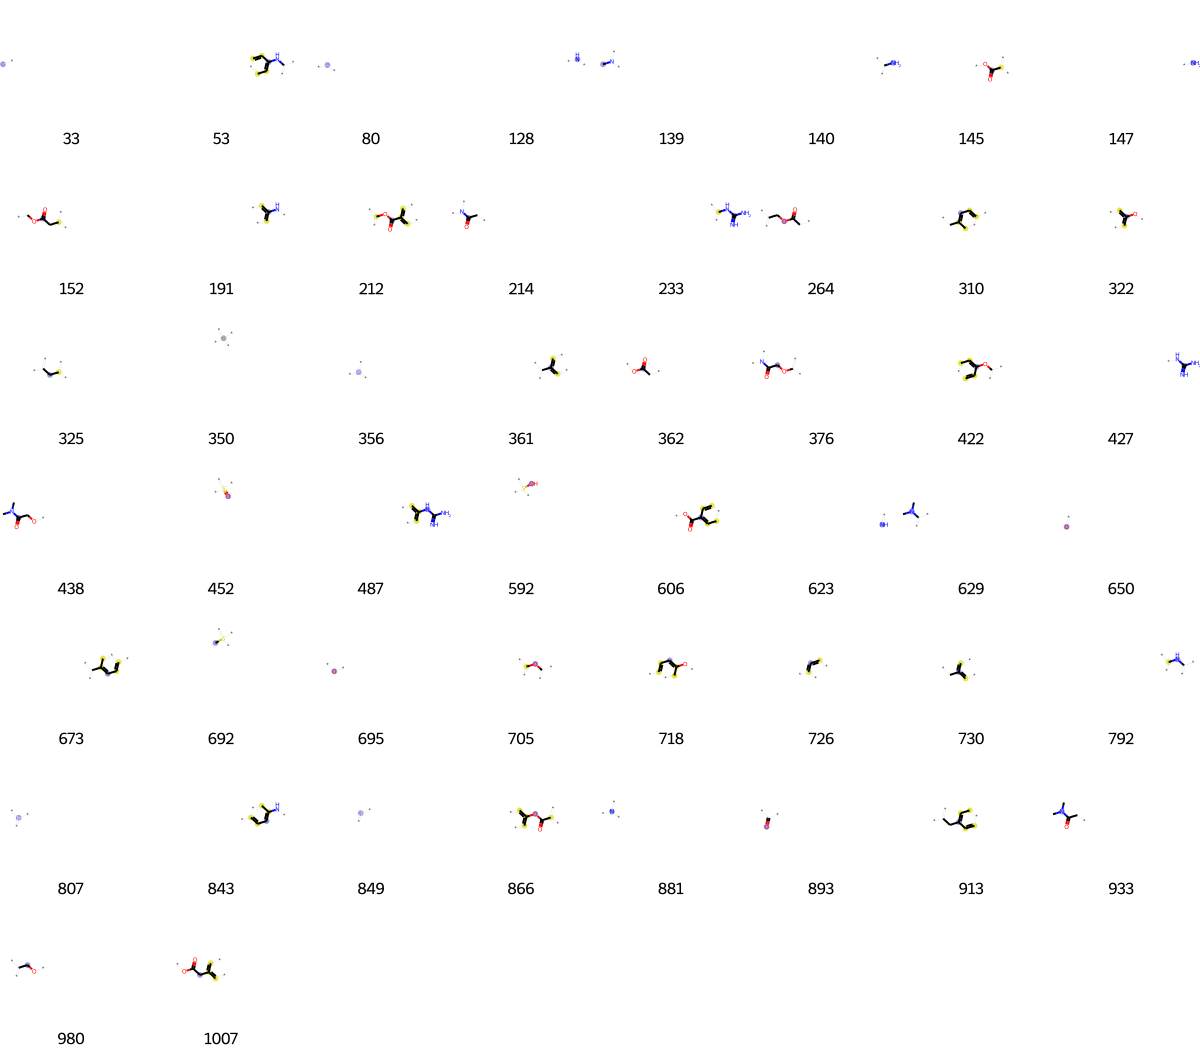

In [508]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [509]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[30,
 33,
 46,
 80,
 128,
 212,
 216,
 219,
 231,
 263,
 267,
 301,
 319,
 350,
 356,
 361,
 367,
 389,
 452,
 458,
 465,
 502,
 540,
 561,
 610,
 650,
 659,
 667,
 698,
 713,
 714,
 715,
 726,
 807,
 816,
 838,
 849,
 857,
 873,
 874,
 883,
 884,
 893,
 902,
 911,
 926,
 956,
 997,
 1002,
 1010,
 1019]

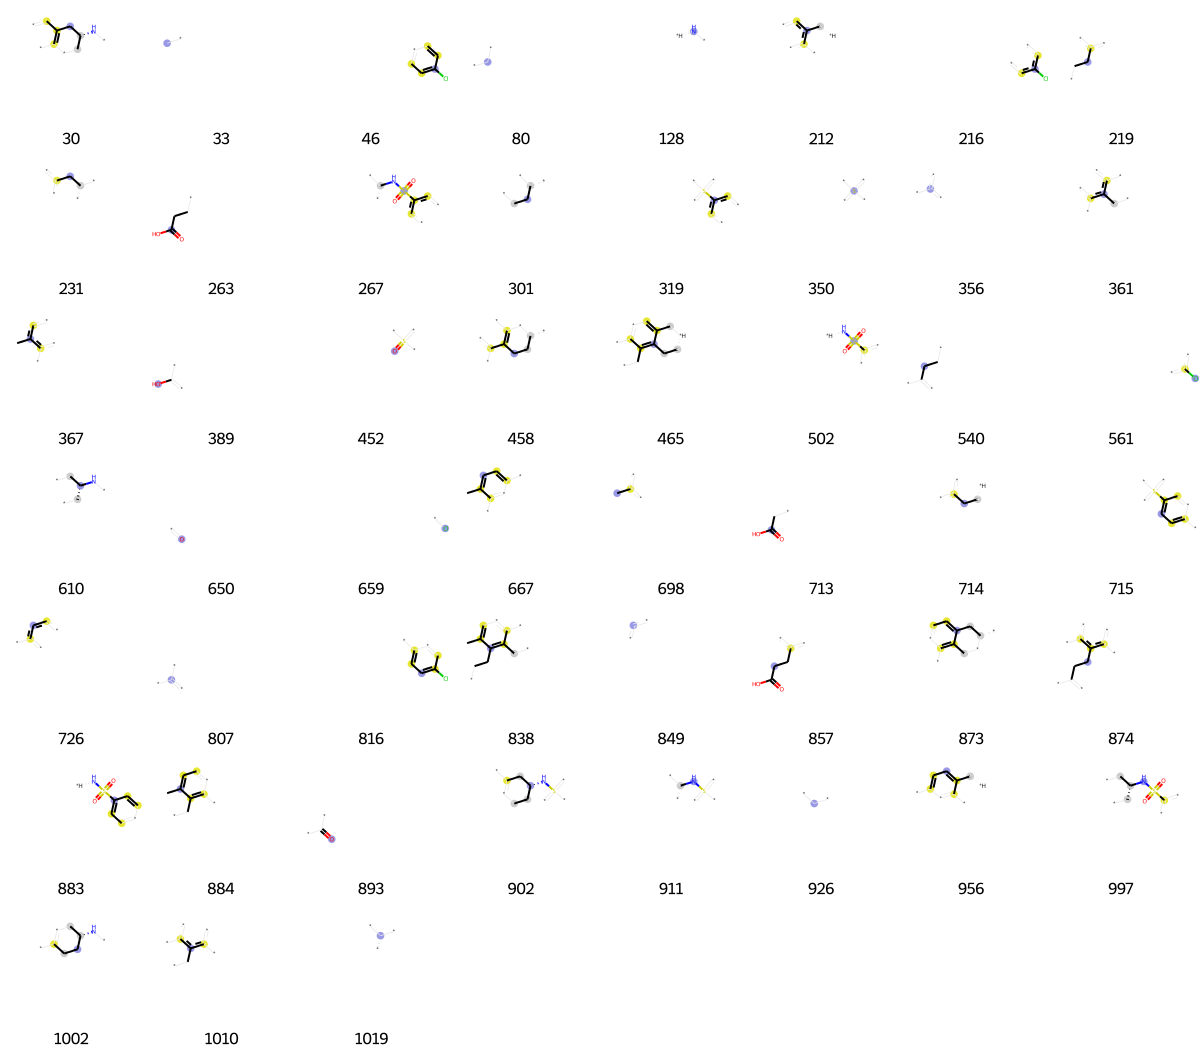

In [510]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [511]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 41,
 53,
 64,
 80,
 119,
 128,
 147,
 175,
 191,
 200,
 235,
 243,
 356,
 358,
 433,
 494,
 540,
 650,
 672,
 694,
 698,
 726,
 792,
 799,
 807,
 816,
 843,
 849,
 887,
 893,
 896,
 901,
 910,
 924,
 999]

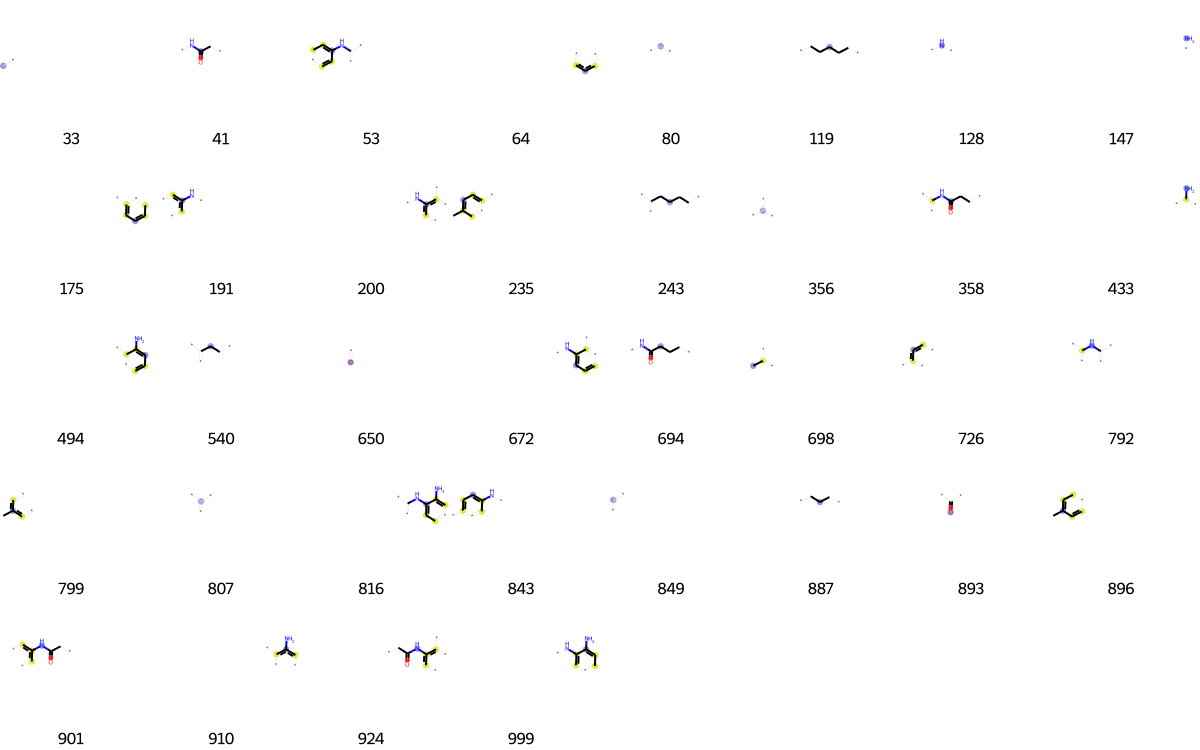

In [512]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [513]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[76,
 80,
 90,
 127,
 192,
 305,
 332,
 362,
 389,
 407,
 440,
 444,
 456,
 466,
 473,
 479,
 483,
 486,
 553,
 573,
 650,
 652,
 694,
 712,
 739,
 767,
 807,
 814,
 819,
 876,
 893,
 926,
 935,
 985,
 1019]

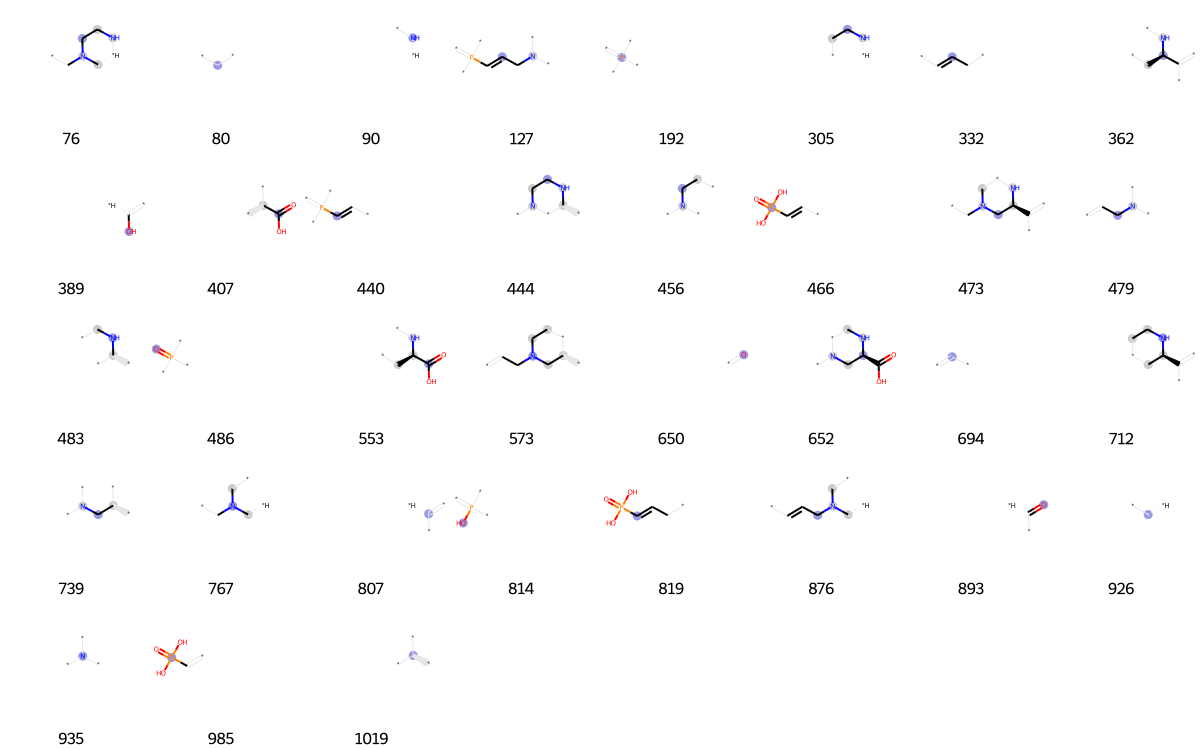

In [514]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [515]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 4,
 33,
 42,
 64,
 70,
 79,
 80,
 86,
 90,
 94,
 108,
 117,
 128,
 140,
 143,
 147,
 175,
 188,
 193,
 197,
 242,
 266,
 283,
 289,
 294,
 301,
 310,
 354,
 356,
 369,
 378,
 389,
 409,
 411,
 427,
 436,
 446,
 456,
 488,
 506,
 507,
 511,
 520,
 523,
 531,
 572,
 573,
 578,
 579,
 592,
 594,
 600,
 623,
 624,
 650,
 667,
 689,
 695,
 708,
 713,
 726,
 730,
 736,
 739,
 745,
 749,
 754,
 761,
 786,
 799,
 806,
 807,
 820,
 825,
 837,
 849,
 851,
 852,
 857,
 867,
 887,
 890,
 892,
 893,
 894,
 918,
 926,
 935,
 963,
 973,
 982,
 983,
 992,
 1015,
 1019]

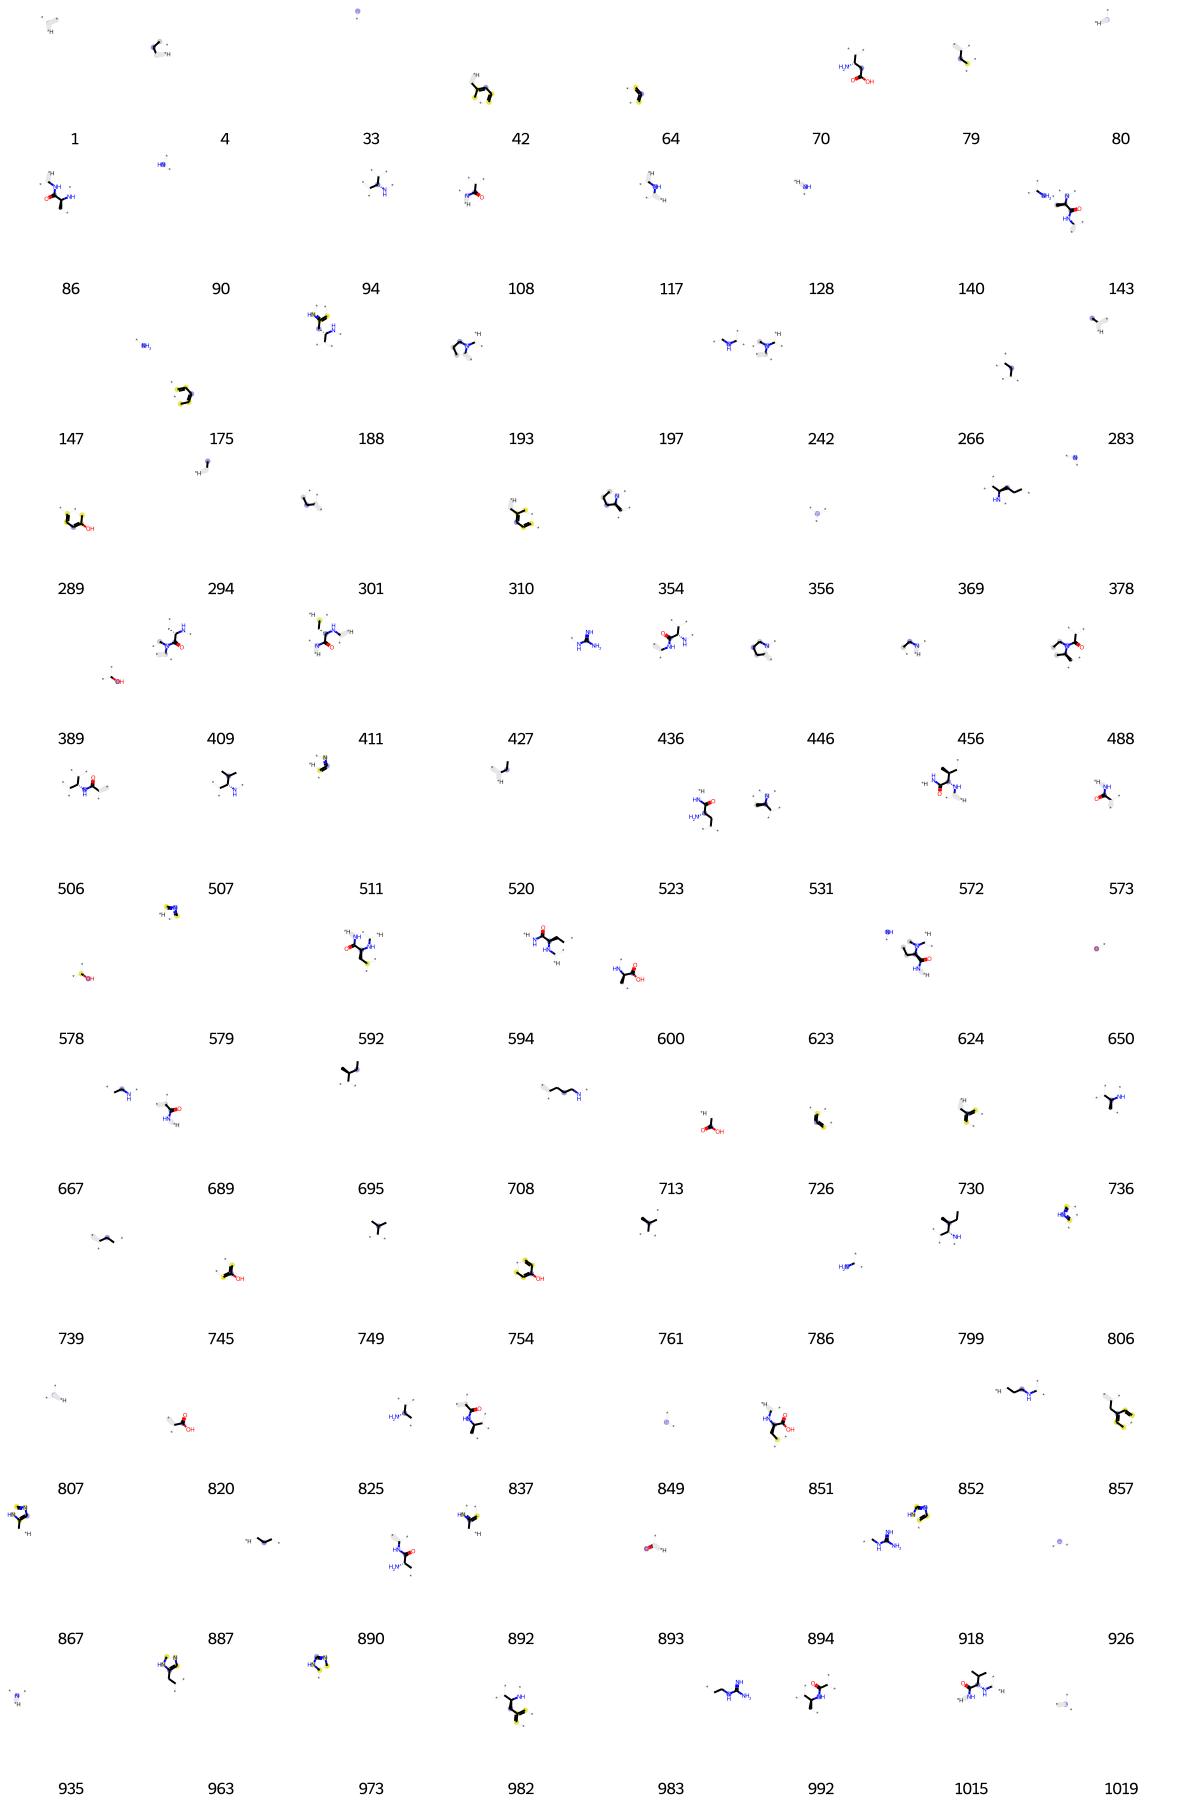

In [516]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [517]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[33,
 64,
 114,
 128,
 175,
 200,
 204,
 246,
 262,
 315,
 350,
 356,
 367,
 375,
 419,
 429,
 435,
 452,
 502,
 573,
 650,
 672,
 698,
 702,
 726,
 766,
 799,
 809,
 849,
 875,
 904,
 915,
 929,
 1021]

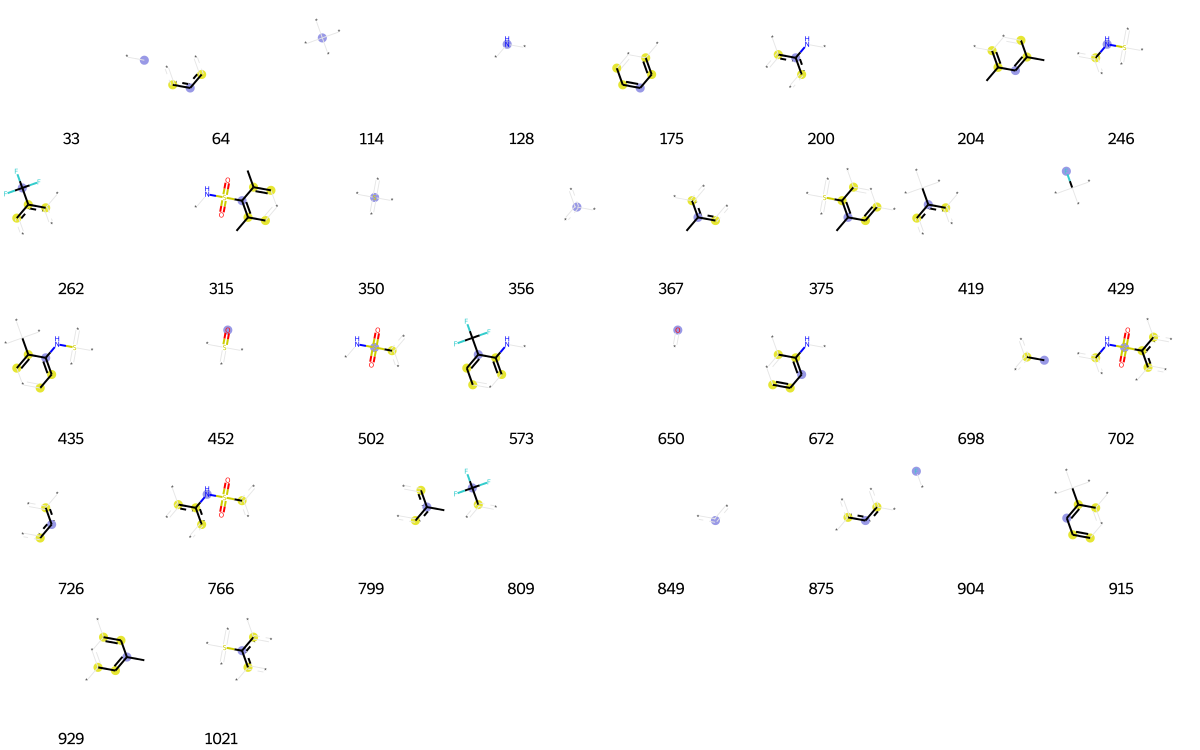

In [518]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [519]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[33,
 36,
 64,
 80,
 139,
 144,
 147,
 175,
 294,
 356,
 389,
 514,
 556,
 588,
 650,
 654,
 679,
 726,
 772,
 807,
 810,
 849,
 881,
 893,
 895,
 911,
 926,
 932,
 933,
 970,
 974,
 978,
 981,
 1008,
 1013,
 1019]

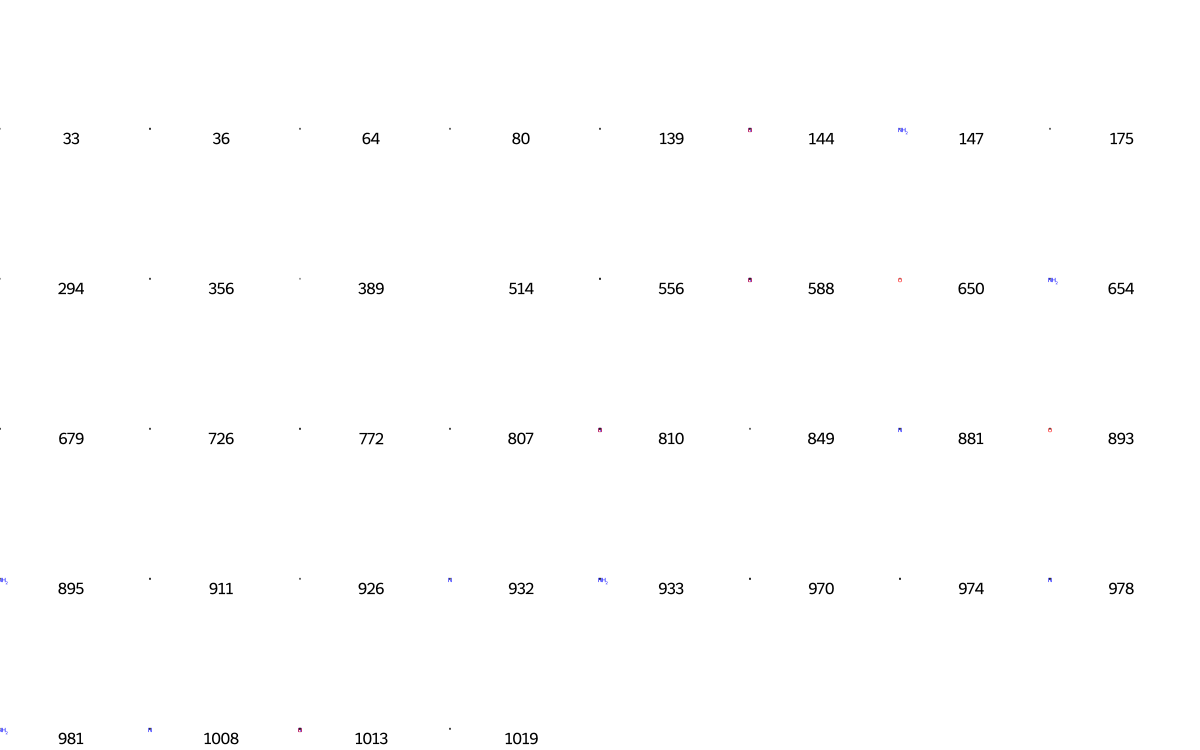

In [520]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [521]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[0, 1, 69, 80, 116, 147, 342, 389, 403, 515, 650, 786, 807, 820, 825, 893]

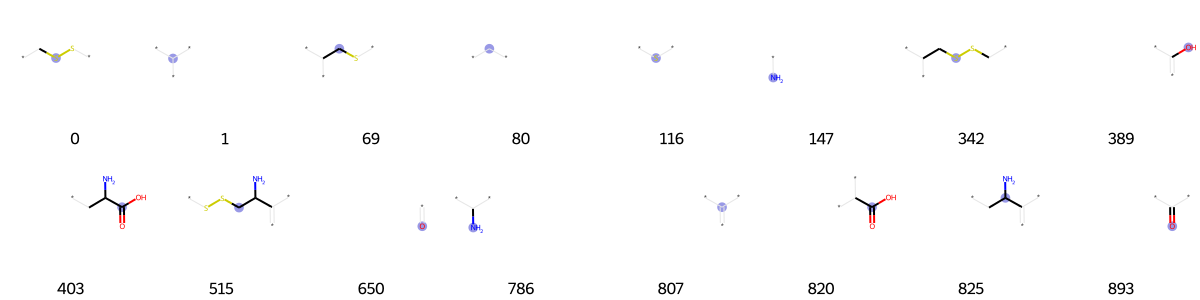

In [522]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [523]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 15,
 33,
 64,
 68,
 69,
 80,
 89,
 90,
 105,
 114,
 118,
 119,
 128,
 143,
 145,
 186,
 227,
 275,
 283,
 329,
 333,
 356,
 386,
 392,
 428,
 430,
 526,
 554,
 585,
 603,
 606,
 639,
 650,
 658,
 695,
 721,
 726,
 759,
 807,
 843,
 849,
 875,
 878,
 882,
 893,
 946,
 954,
 963,
 1014]

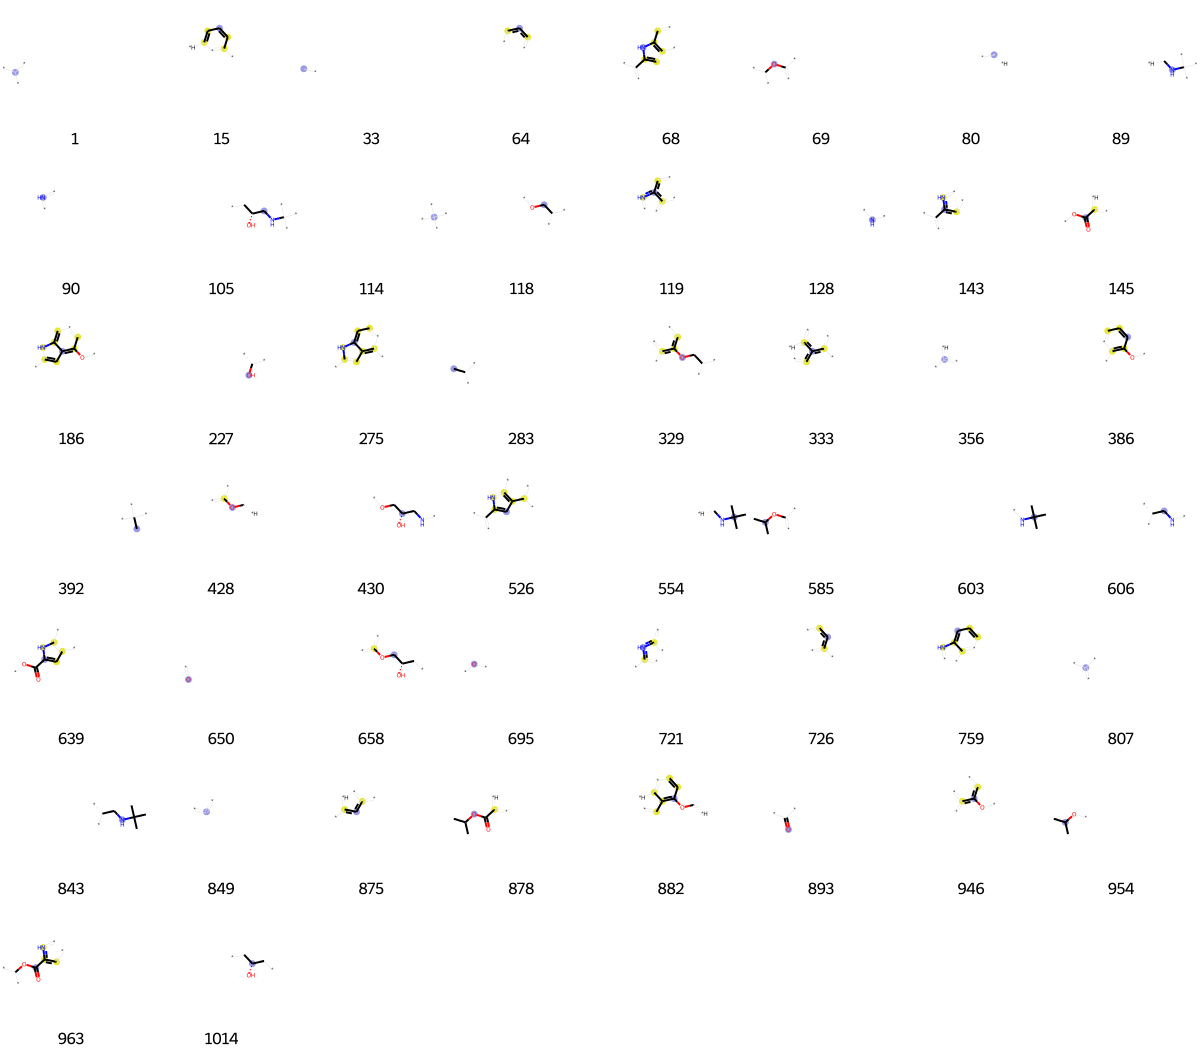

In [524]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [525]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[7,
 13,
 74,
 80,
 106,
 114,
 128,
 191,
 203,
 210,
 222,
 233,
 356,
 361,
 389,
 456,
 463,
 469,
 492,
 565,
 610,
 650,
 656,
 673,
 726,
 740,
 778,
 807,
 820,
 843,
 849,
 881,
 893,
 897,
 1019]

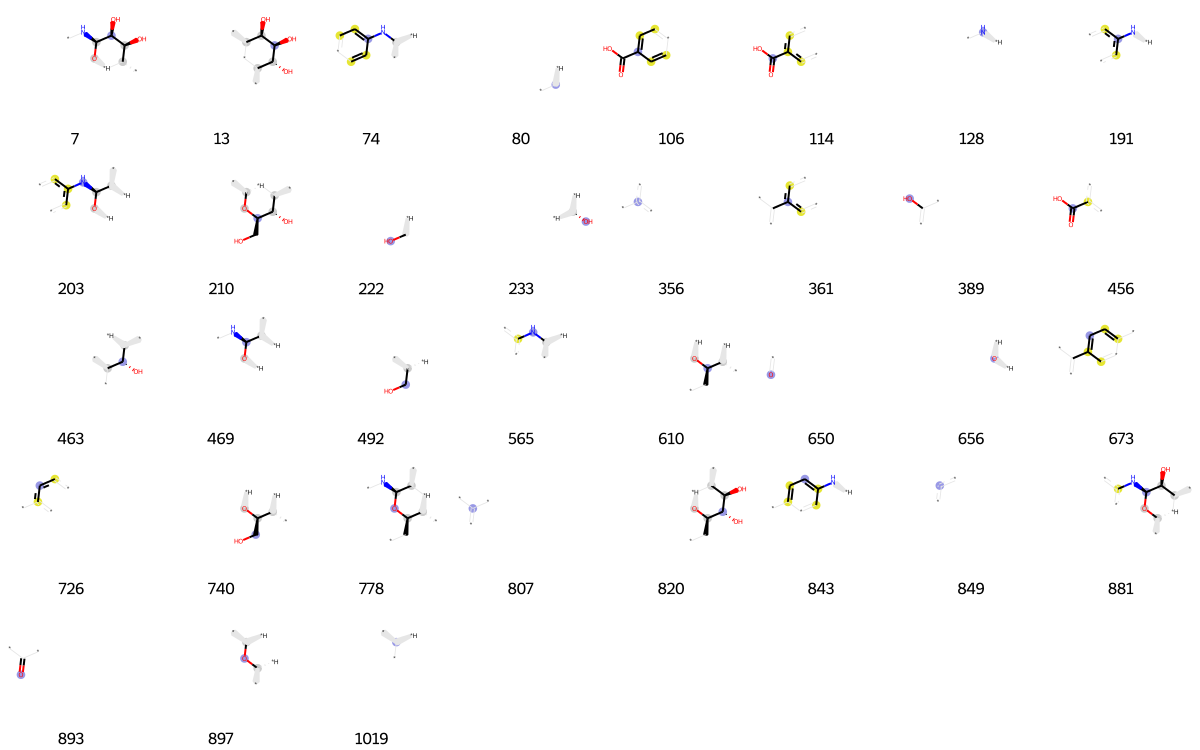

In [526]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [527]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[1,
 15,
 33,
 44,
 64,
 80,
 89,
 90,
 105,
 112,
 114,
 118,
 119,
 123,
 128,
 186,
 208,
 227,
 275,
 329,
 333,
 356,
 360,
 386,
 392,
 428,
 430,
 554,
 566,
 603,
 606,
 658,
 674,
 695,
 721,
 726,
 759,
 790,
 807,
 843,
 849,
 875,
 882,
 898,
 946,
 1014]

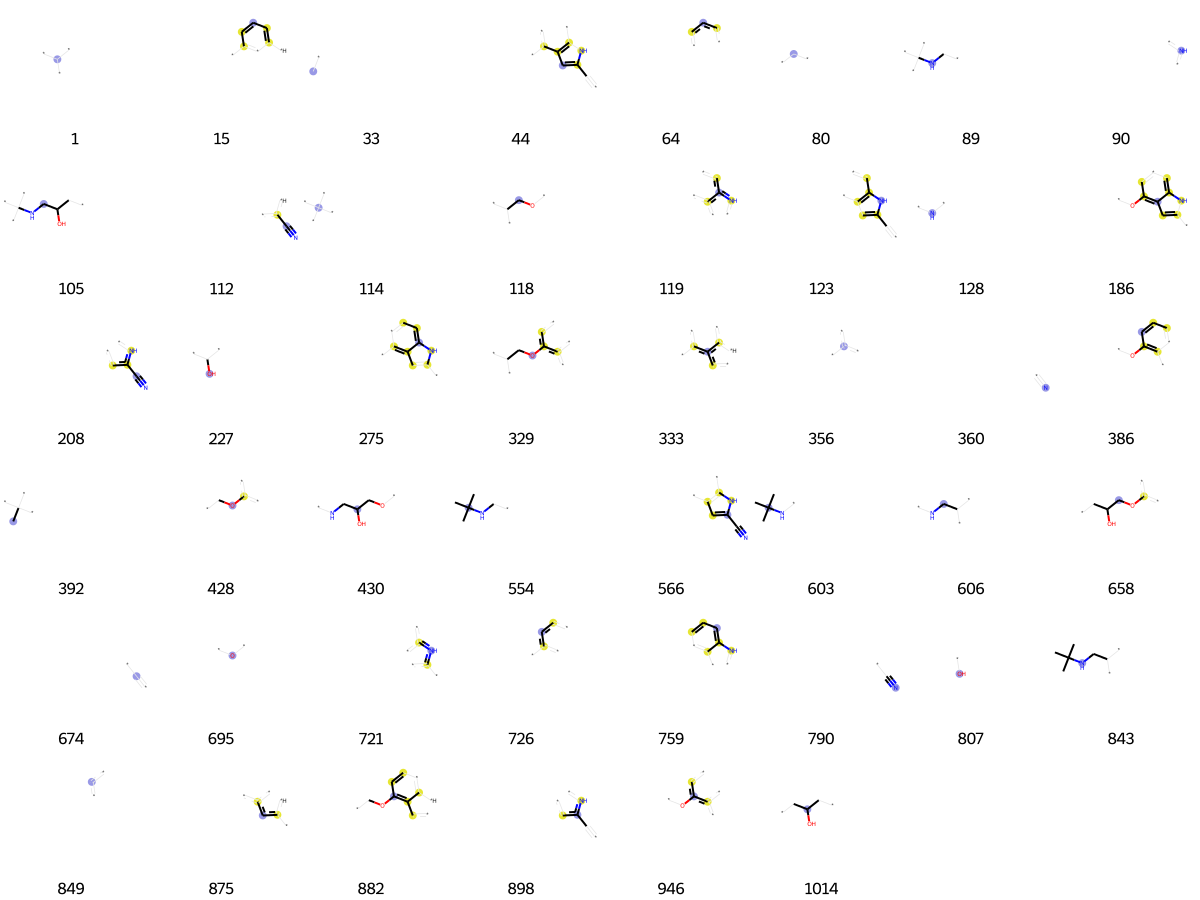

In [528]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [529]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[2,
 4,
 41,
 64,
 72,
 80,
 114,
 121,
 175,
 284,
 301,
 356,
 389,
 393,
 394,
 398,
 456,
 458,
 514,
 660,
 718,
 726,
 758,
 767,
 799,
 807,
 849,
 884,
 890,
 926,
 935,
 974,
 993,
 1008,
 1019]

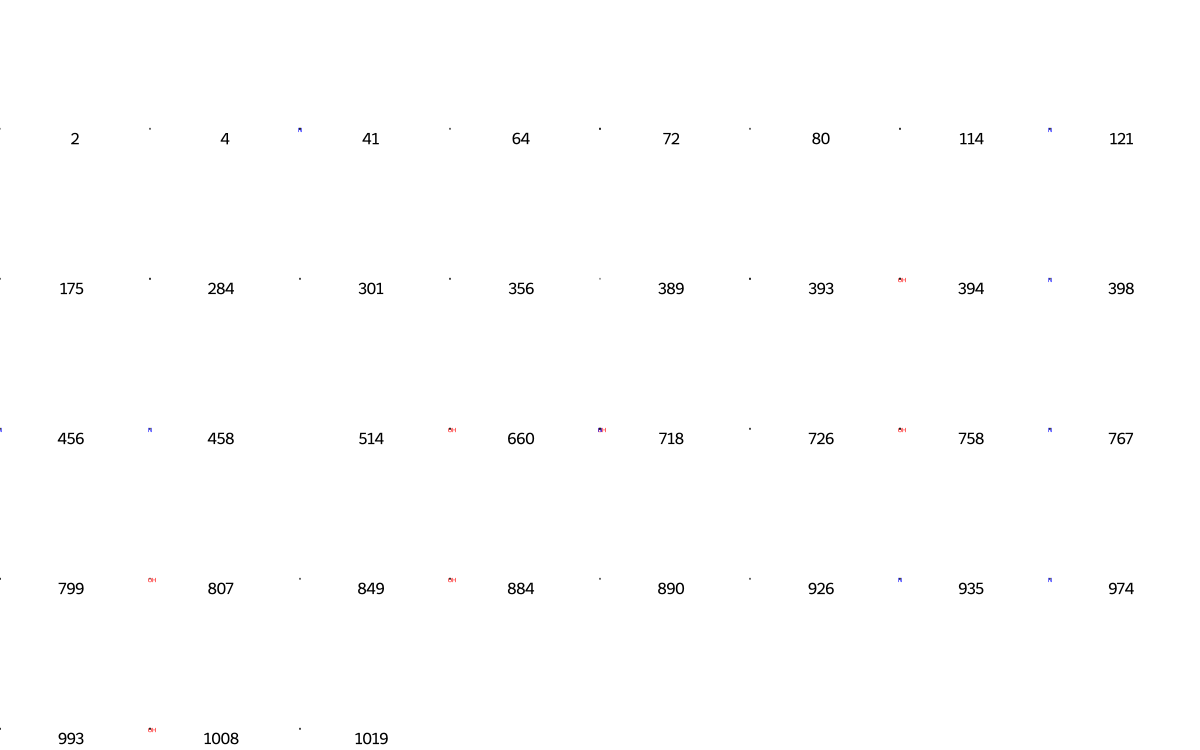

In [530]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [531]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[1,
 33,
 80,
 86,
 89,
 105,
 114,
 118,
 128,
 182,
 227,
 235,
 329,
 356,
 366,
 392,
 428,
 430,
 554,
 561,
 603,
 606,
 658,
 659,
 666,
 695,
 698,
 726,
 791,
 799,
 807,
 843,
 849,
 875,
 946,
 1013,
 1014]

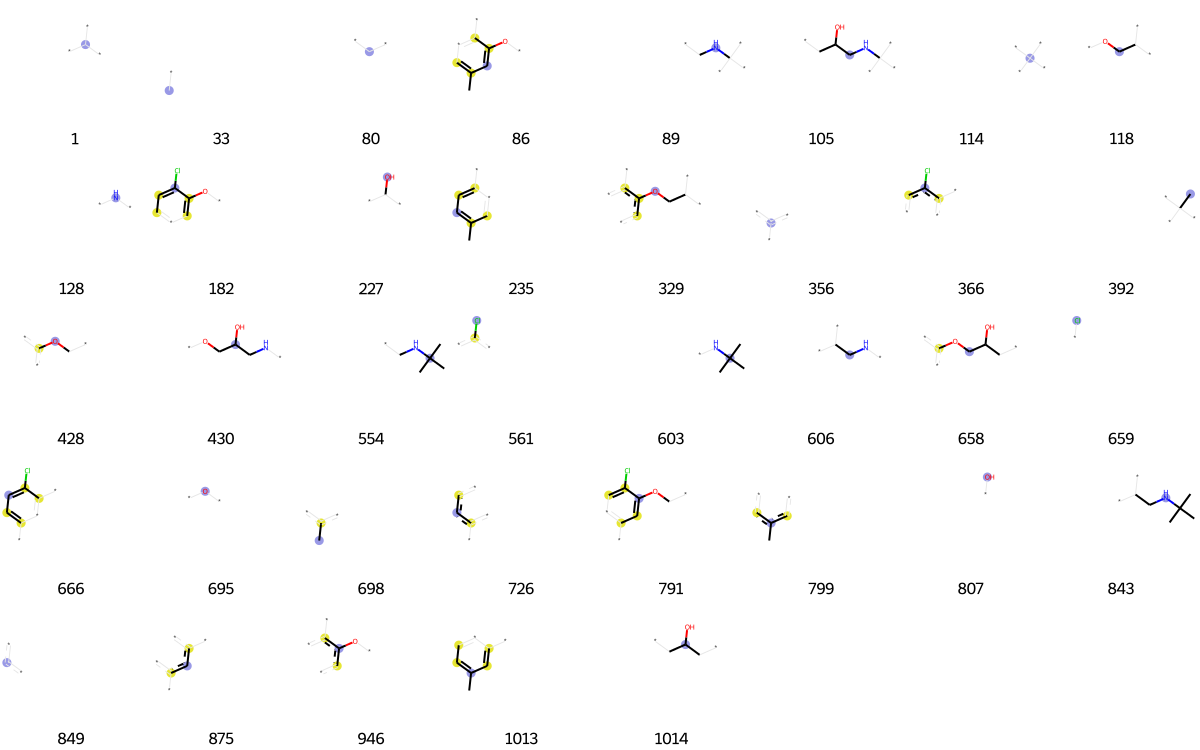

In [532]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [533]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[0,
 19,
 33,
 64,
 136,
 147,
 154,
 235,
 241,
 257,
 338,
 356,
 361,
 378,
 433,
 437,
 458,
 480,
 487,
 503,
 511,
 562,
 579,
 650,
 673,
 698,
 726,
 736,
 799,
 807,
 831,
 833,
 842,
 849,
 893,
 896,
 932,
 935,
 964,
 999]

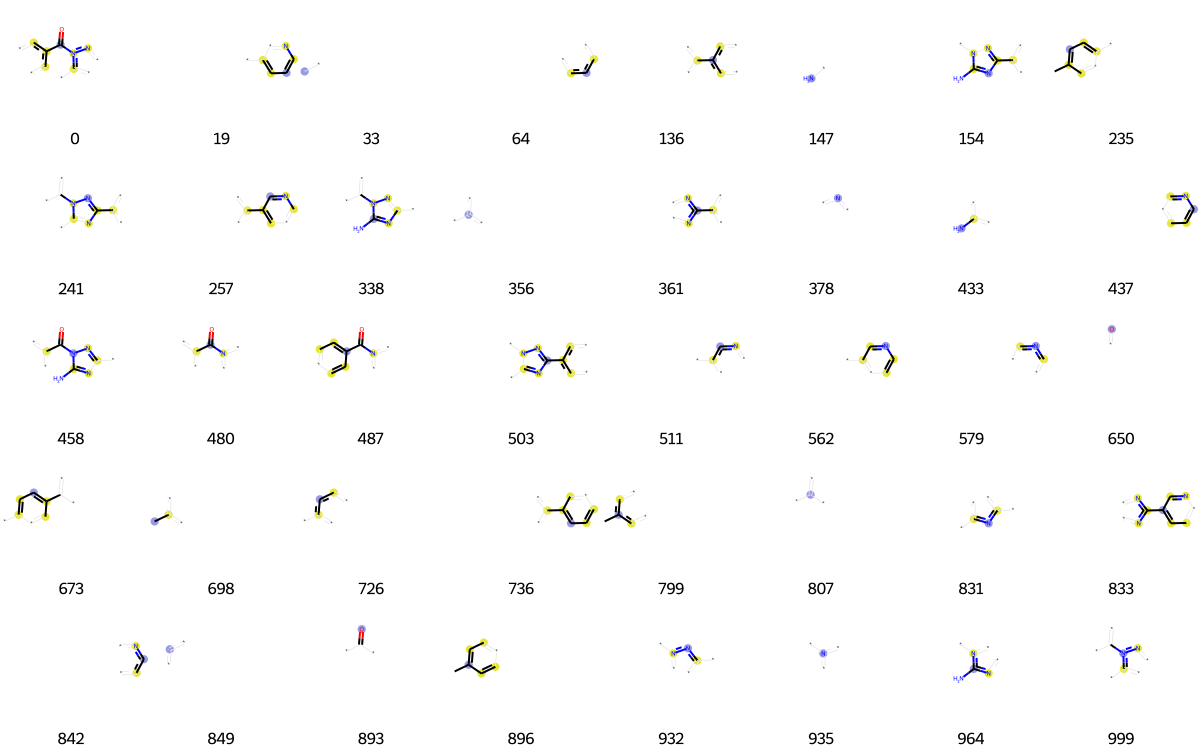

In [534]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [535]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[33,
 45,
 64,
 77,
 80,
 97,
 121,
 175,
 239,
 261,
 276,
 301,
 314,
 319,
 333,
 356,
 378,
 387,
 398,
 422,
 428,
 431,
 432,
 515,
 549,
 564,
 587,
 650,
 664,
 698,
 702,
 714,
 719,
 723,
 726,
 784,
 824,
 842,
 849,
 908,
 917,
 926,
 928,
 935,
 1011,
 1019]

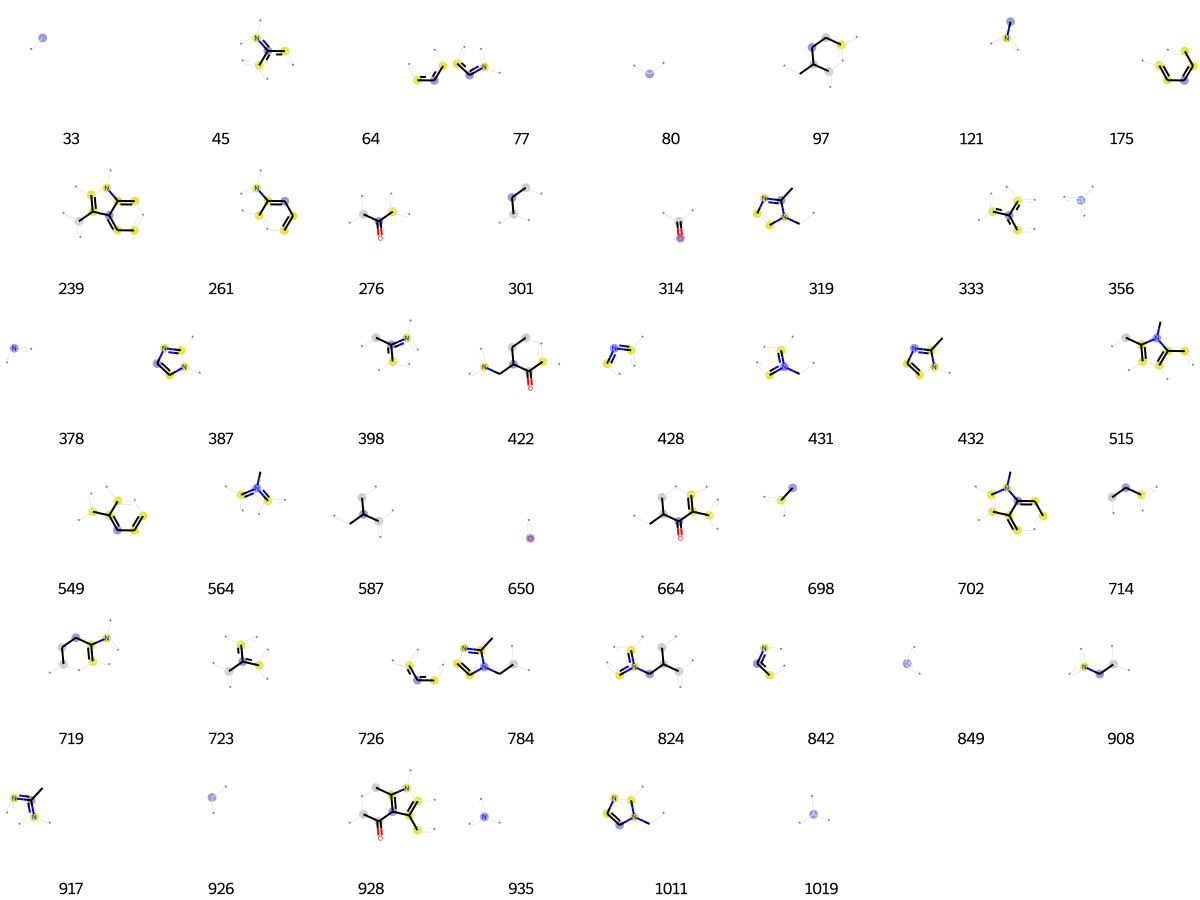

In [536]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [537]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[46, 216, 226, 328, 356, 361, 561, 650, 659, 673, 726, 807, 816, 849, 893]

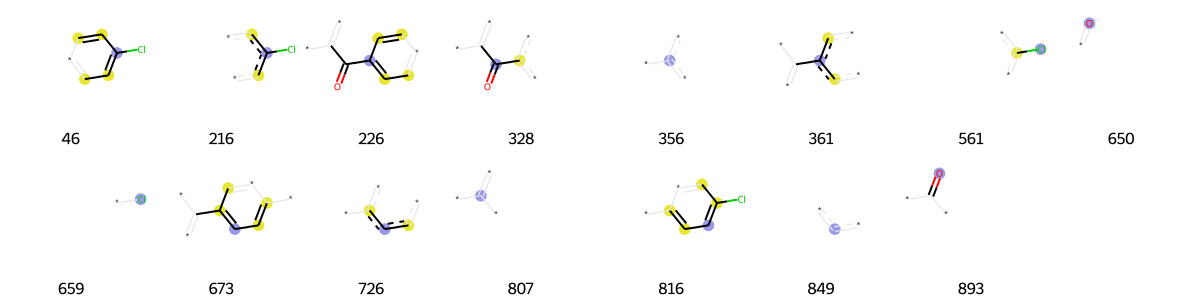

In [538]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [539]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[32,
 33,
 80,
 116,
 134,
 162,
 179,
 195,
 294,
 333,
 341,
 356,
 378,
 419,
 428,
 489,
 490,
 493,
 511,
 520,
 527,
 528,
 534,
 561,
 623,
 650,
 656,
 659,
 669,
 675,
 726,
 759,
 775,
 786,
 807,
 840,
 849,
 875,
 893,
 894,
 898,
 935,
 936,
 961]

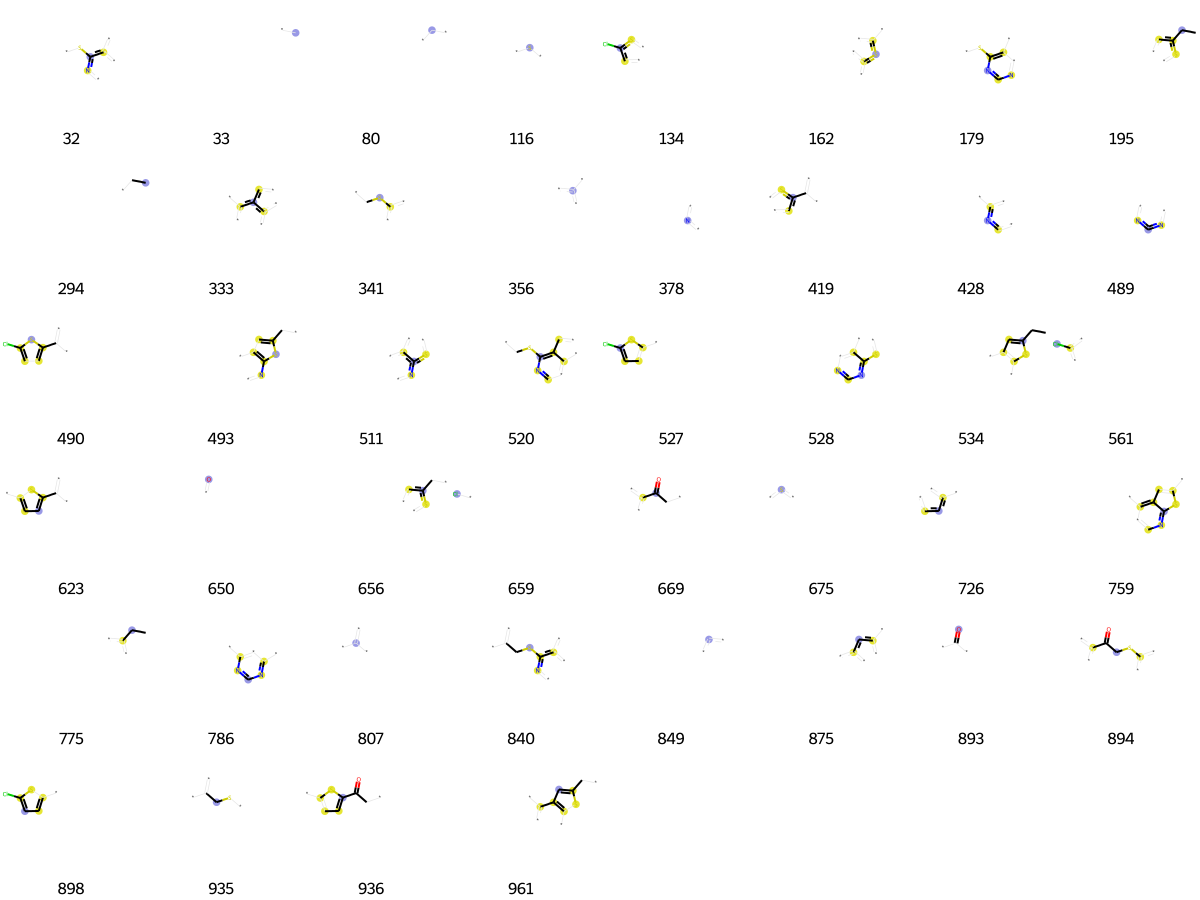

In [540]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [541]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[58, 80, 119, 147, 493, 816, 887, 981]

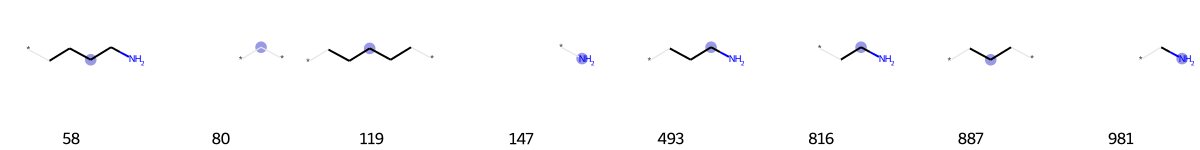

In [542]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [543]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[10,
 13,
 33,
 62,
 73,
 76,
 80,
 90,
 102,
 116,
 294,
 310,
 322,
 341,
 356,
 378,
 428,
 463,
 514,
 586,
 623,
 641,
 695,
 713,
 718,
 726,
 730,
 762,
 770,
 794,
 849,
 870,
 913,
 980]

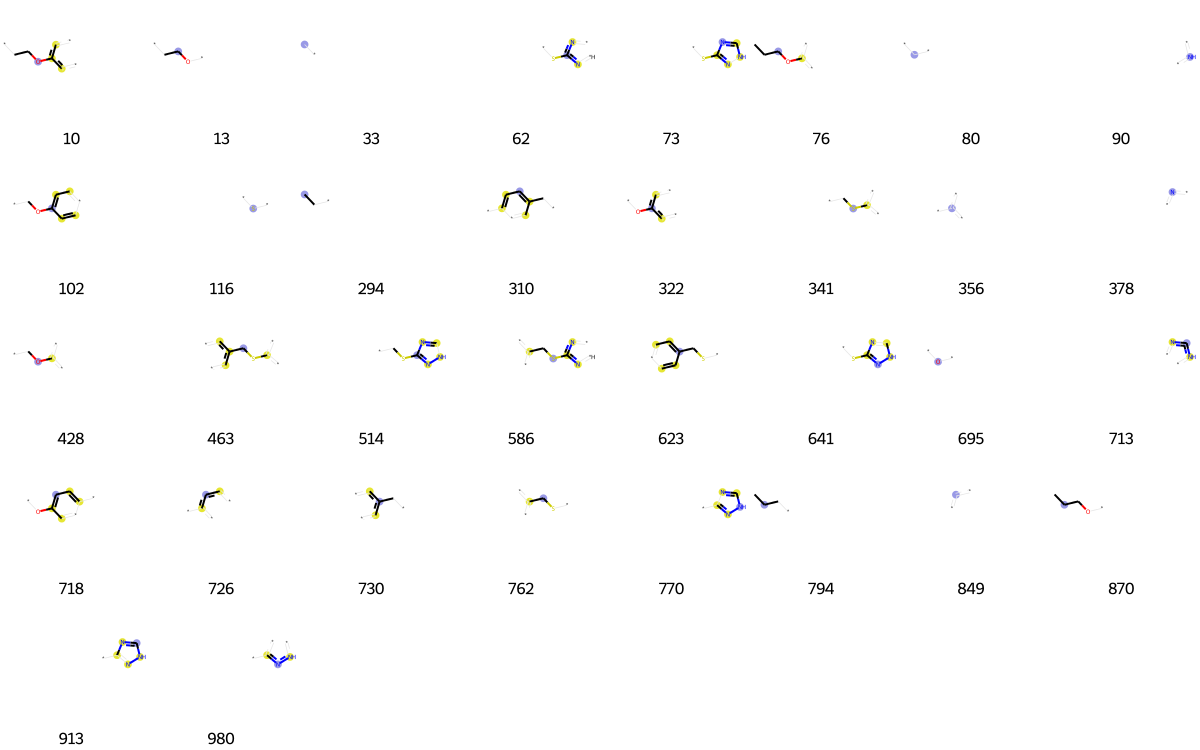

In [544]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [545]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[33,
 54,
 64,
 80,
 84,
 117,
 123,
 136,
 145,
 147,
 162,
 175,
 214,
 252,
 294,
 302,
 356,
 389,
 433,
 486,
 512,
 586,
 650,
 652,
 675,
 695,
 698,
 726,
 736,
 759,
 807,
 849,
 876,
 893]

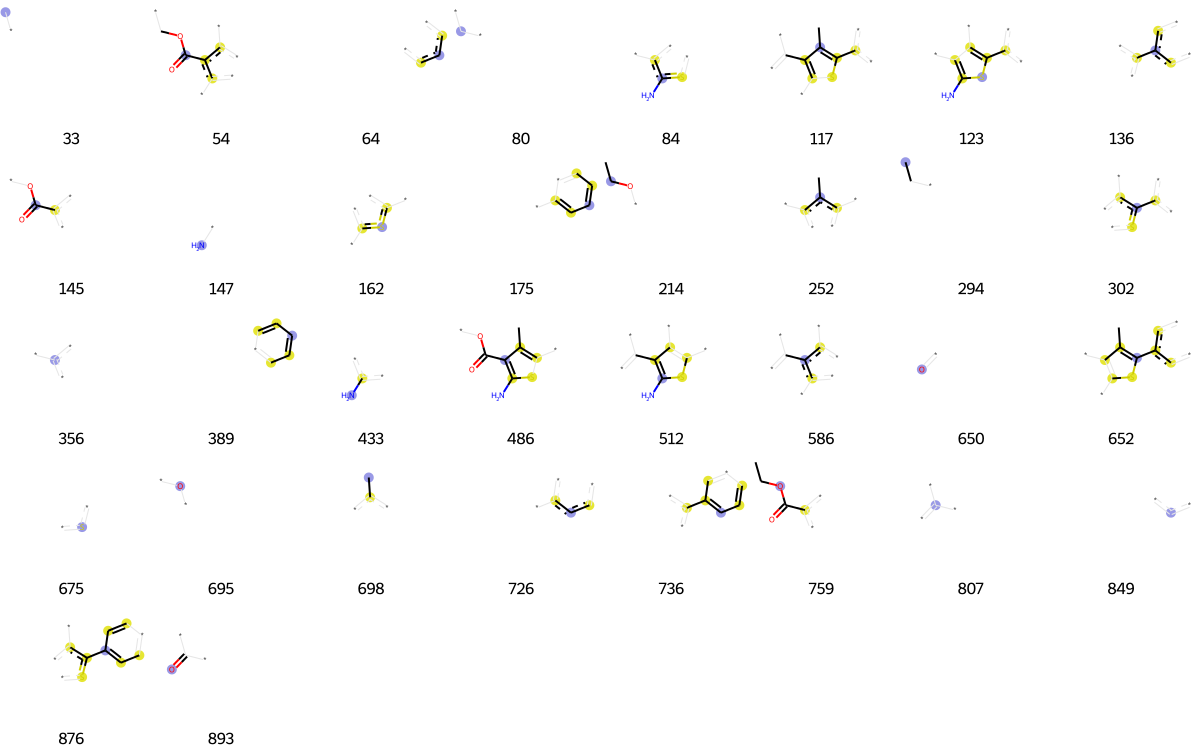

In [546]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [547]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 25,
 33,
 56,
 80,
 81,
 90,
 117,
 136,
 139,
 169,
 227,
 232,
 237,
 255,
 266,
 283,
 285,
 323,
 350,
 356,
 378,
 386,
 387,
 389,
 438,
 452,
 471,
 540,
 554,
 561,
 582,
 598,
 600,
 612,
 646,
 650,
 677,
 680,
 692,
 694,
 699,
 713,
 726,
 752,
 786,
 807,
 831,
 835,
 849,
 881,
 893,
 896,
 902,
 904,
 965,
 1014]

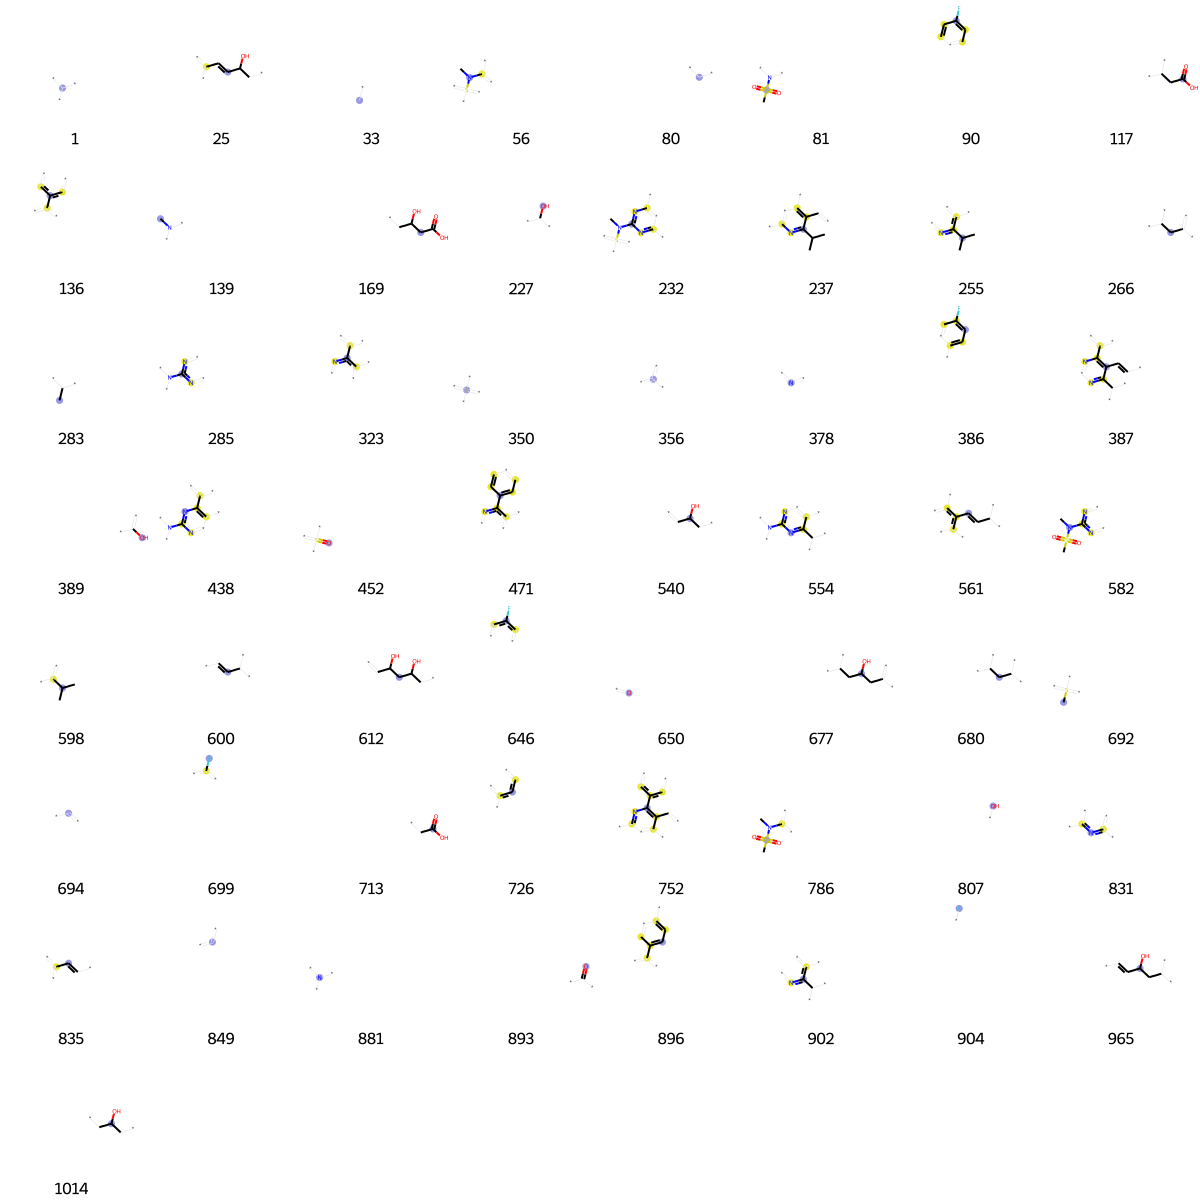

In [548]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [549]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[33,
 36,
 57,
 75,
 84,
 127,
 130,
 138,
 182,
 184,
 242,
 250,
 253,
 289,
 292,
 301,
 314,
 345,
 356,
 364,
 408,
 412,
 436,
 441,
 455,
 507,
 519,
 529,
 555,
 559,
 622,
 649,
 650,
 674,
 714,
 717,
 807,
 841,
 849,
 909,
 915,
 926,
 974,
 1019]

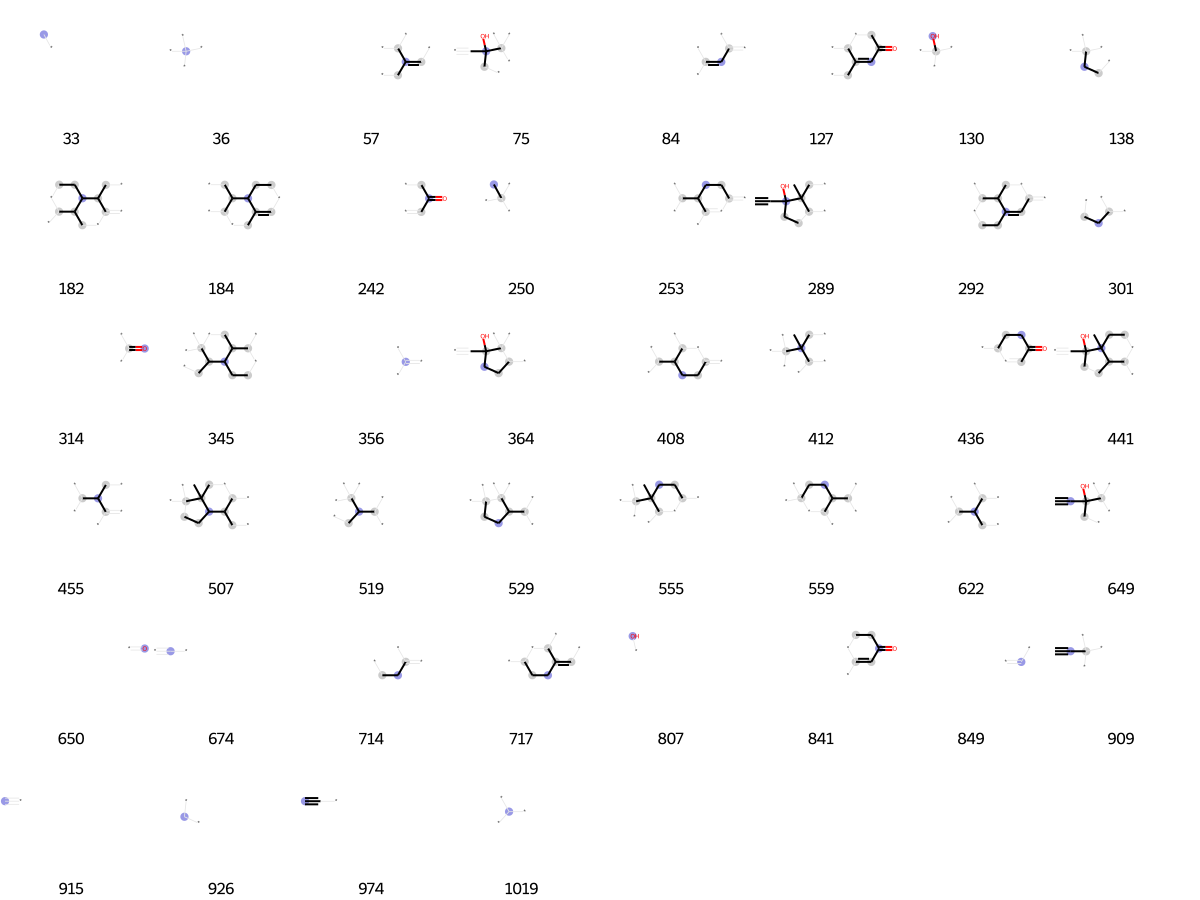

In [550]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [551]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[4,
 33,
 53,
 64,
 77,
 80,
 116,
 121,
 143,
 175,
 201,
 231,
 271,
 289,
 301,
 323,
 343,
 356,
 394,
 397,
 456,
 486,
 489,
 514,
 528,
 548,
 561,
 562,
 588,
 623,
 675,
 699,
 711,
 726,
 744,
 811,
 832,
 849,
 875,
 890,
 917,
 926,
 935,
 949,
 974,
 1019,
 1020]

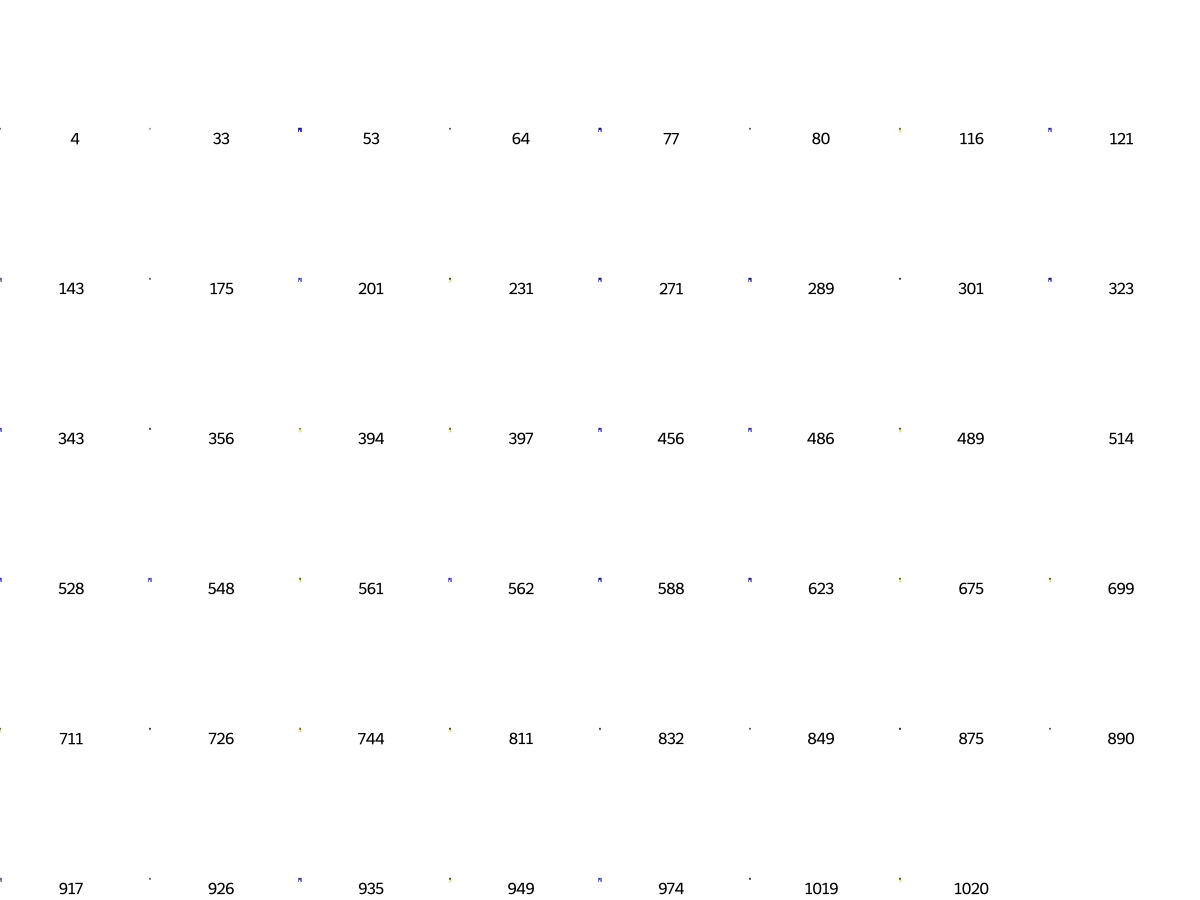

In [552]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [553]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[15,
 33,
 36,
 64,
 90,
 112,
 130,
 165,
 200,
 216,
 237,
 250,
 285,
 356,
 447,
 489,
 495,
 514,
 549,
 551,
 556,
 561,
 592,
 656,
 659,
 698,
 726,
 772,
 807,
 849,
 875,
 881,
 921,
 926,
 1017,
 1019,
 1022]

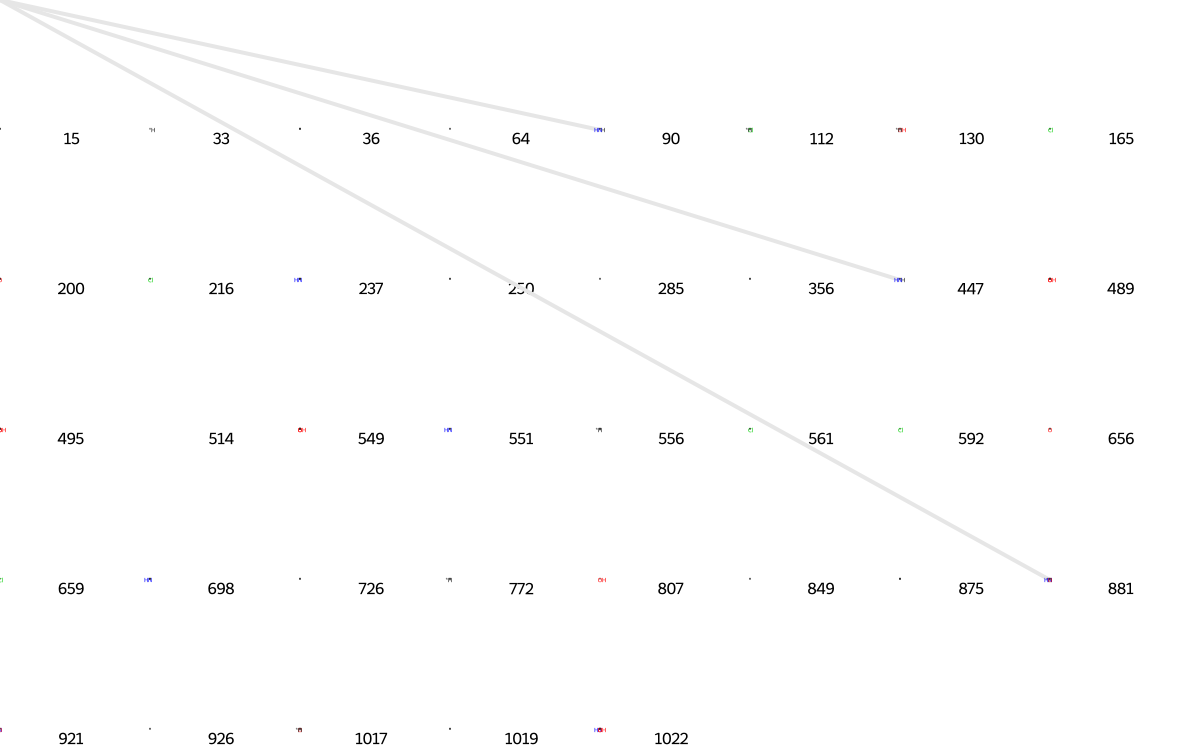

In [554]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [555]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[33,
 36,
 74,
 90,
 94,
 140,
 212,
 221,
 233,
 249,
 314,
 356,
 361,
 370,
 407,
 428,
 456,
 480,
 484,
 496,
 497,
 512,
 551,
 565,
 569,
 618,
 622,
 641,
 650,
 673,
 687,
 695,
 714,
 726,
 801,
 807,
 841,
 849,
 875,
 893,
 926,
 935,
 942,
 946,
 958,
 973,
 985,
 988,
 1017]

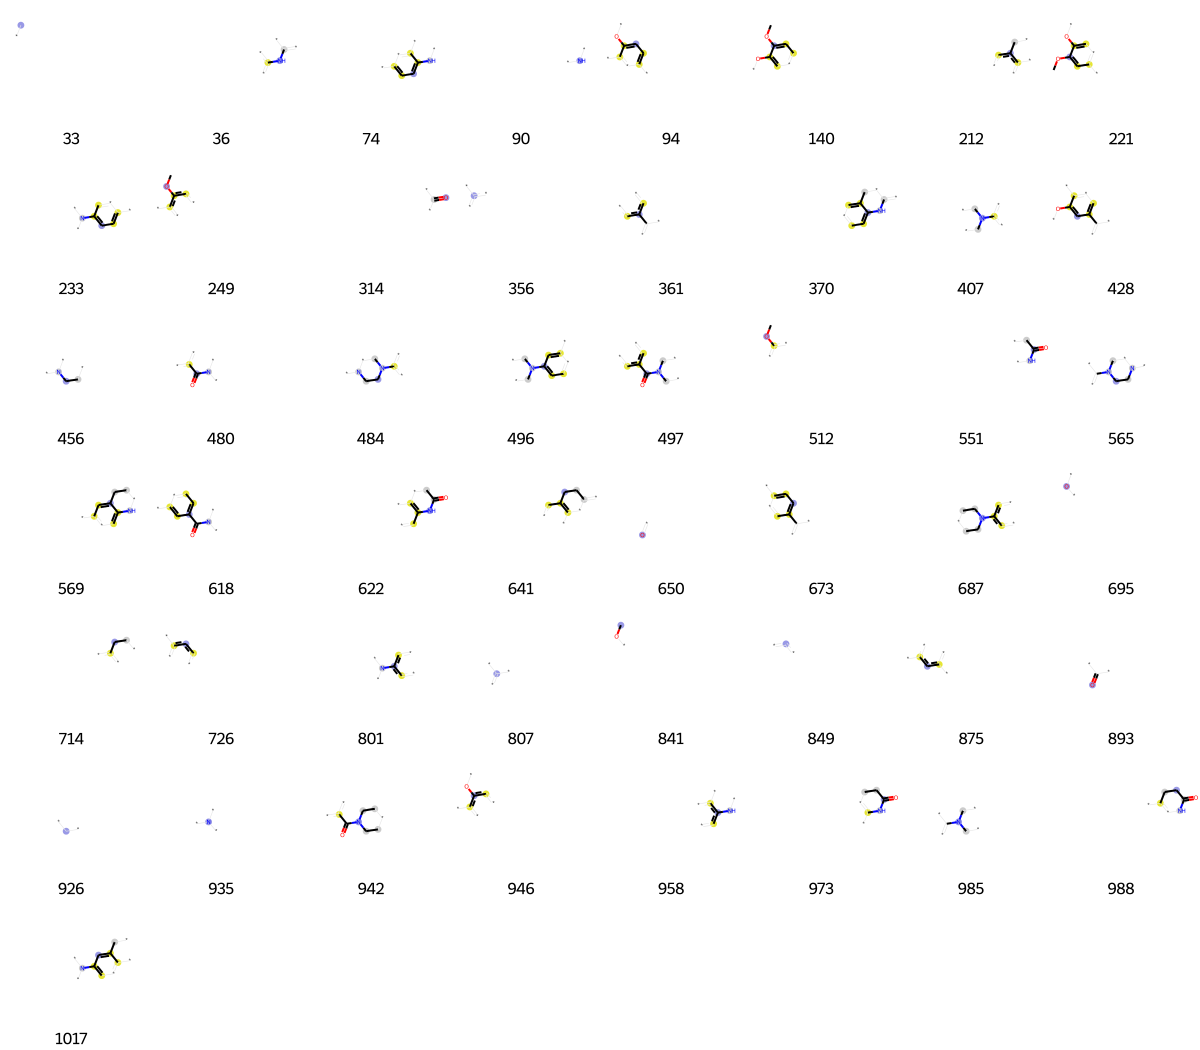

In [556]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [557]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[33,
 45,
 73,
 80,
 128,
 140,
 147,
 207,
 235,
 238,
 356,
 357,
 378,
 392,
 410,
 415,
 428,
 459,
 511,
 548,
 626,
 667,
 672,
 698,
 708,
 726,
 736,
 770,
 777,
 799,
 816,
 831,
 849,
 875,
 883,
 892,
 897,
 935,
 961,
 981,
 1013]

In [558]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[3,
 16,
 33,
 64,
 77,
 147,
 212,
 216,
 226,
 268,
 270,
 343,
 350,
 356,
 378,
 386,
 452,
 463,
 464,
 493,
 510,
 531,
 646,
 650,
 656,
 692,
 699,
 703,
 706,
 710,
 726,
 739,
 764,
 802,
 803,
 808,
 816,
 827,
 830,
 849,
 874,
 875,
 886,
 898,
 899,
 904,
 922,
 924,
 926,
 927,
 932,
 935,
 955,
 966,
 1019]

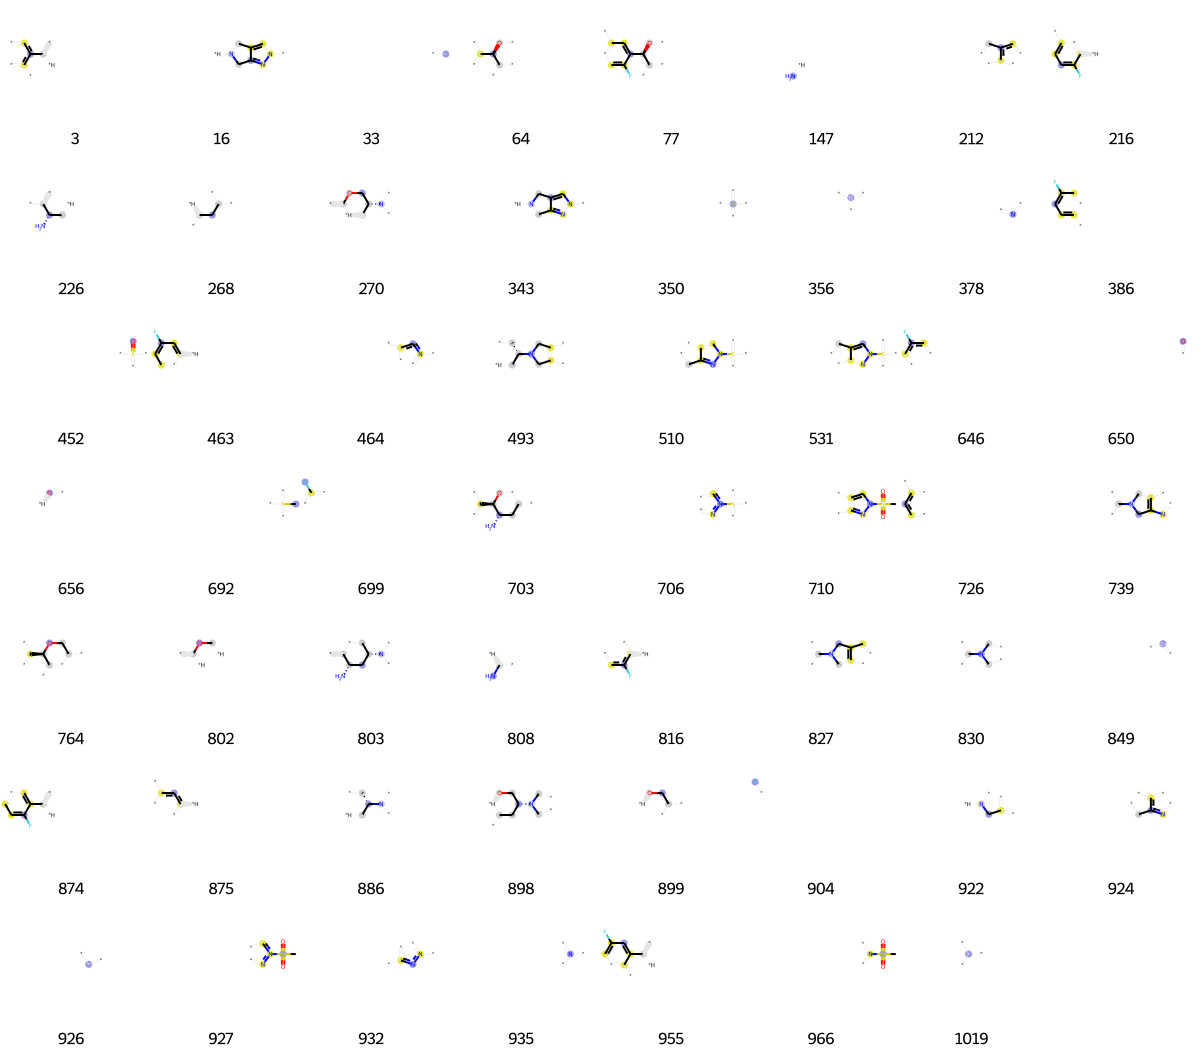

In [559]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [560]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 33,
 64,
 80,
 101,
 110,
 116,
 140,
 147,
 175,
 233,
 237,
 251,
 309,
 341,
 356,
 357,
 377,
 385,
 401,
 423,
 479,
 540,
 550,
 558,
 560,
 650,
 686,
 690,
 694,
 726,
 761,
 803,
 807,
 837,
 849,
 893,
 967,
 1017]

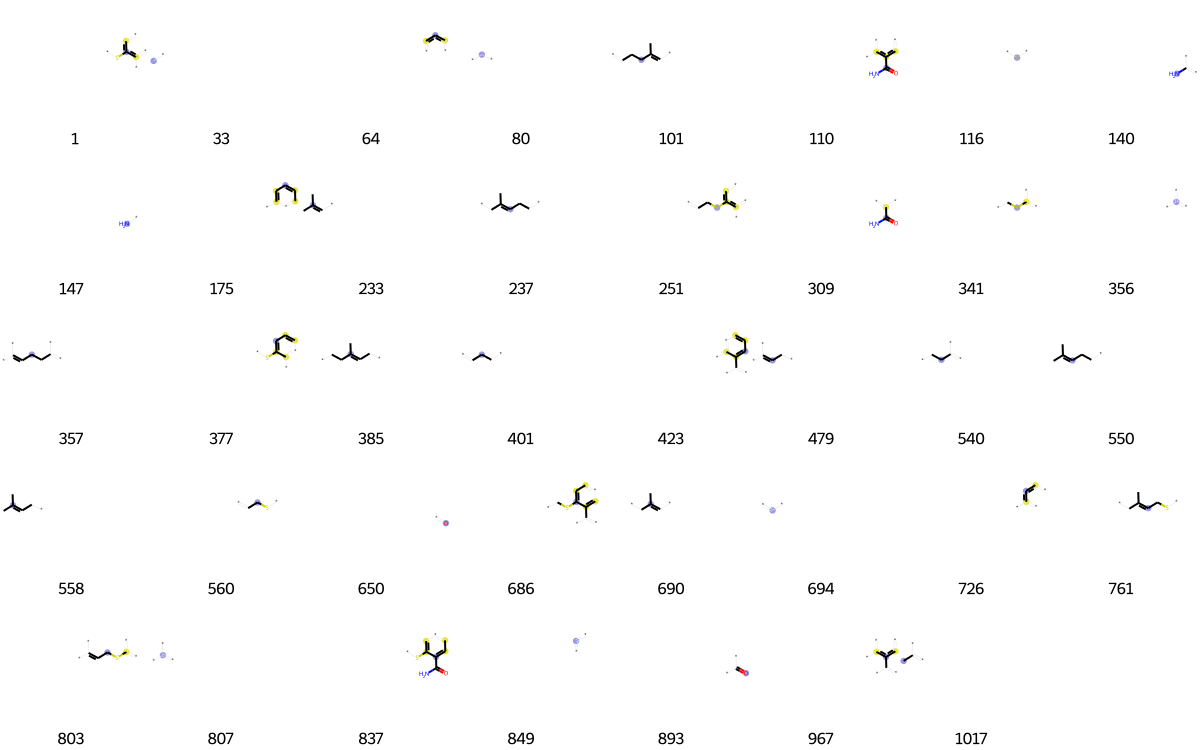

In [561]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [562]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[15,
 23,
 33,
 63,
 64,
 80,
 114,
 116,
 134,
 140,
 145,
 147,
 151,
 153,
 175,
 210,
 292,
 322,
 333,
 341,
 352,
 356,
 360,
 361,
 378,
 498,
 512,
 548,
 549,
 580,
 599,
 606,
 650,
 656,
 673,
 674,
 694,
 695,
 696,
 718,
 726,
 781,
 807,
 828,
 831,
 841,
 849,
 860,
 891,
 893,
 936,
 979,
 984,
 1000]

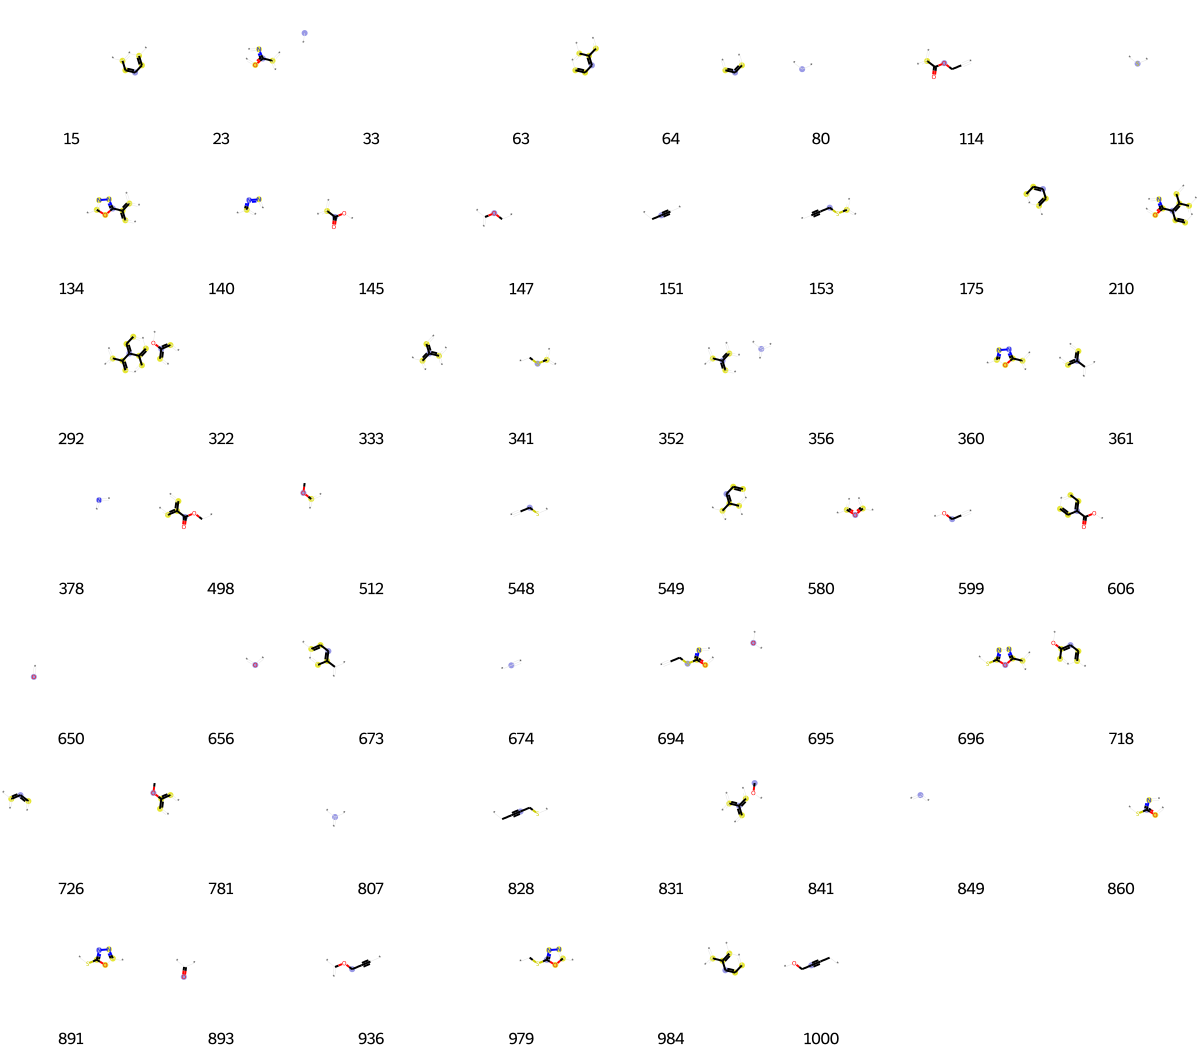

In [563]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [564]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[5,
 33,
 45,
 62,
 73,
 90,
 116,
 231,
 314,
 356,
 378,
 428,
 629,
 641,
 650,
 662,
 695,
 698,
 699,
 713,
 747,
 770,
 798,
 799,
 801,
 819,
 849,
 871,
 875,
 888,
 913,
 916,
 926,
 929,
 935,
 951,
 959,
 980,
 1019]

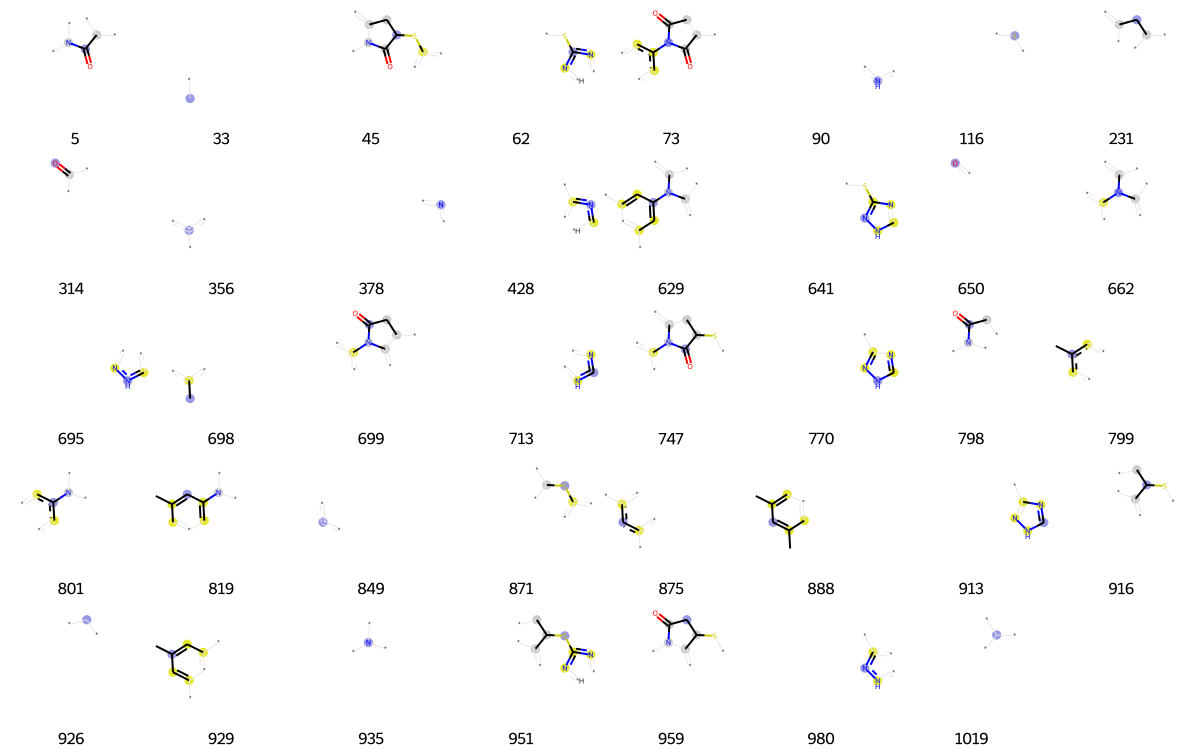

In [565]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [566]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[21,
 77,
 90,
 136,
 219,
 233,
 314,
 320,
 356,
 378,
 396,
 397,
 516,
 545,
 551,
 579,
 630,
 650,
 714,
 726,
 728,
 774,
 801,
 842,
 843,
 848,
 849,
 860,
 896,
 903,
 926,
 932,
 935,
 988,
 991]

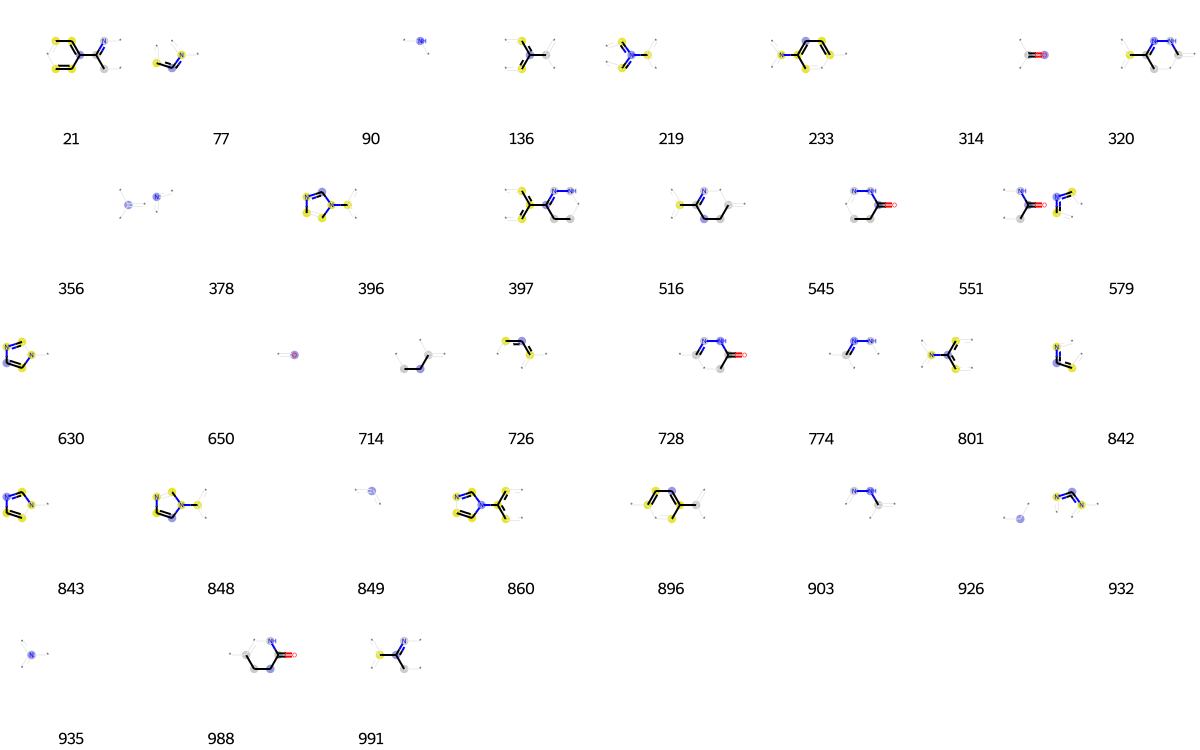

In [567]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [568]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[61,
 90,
 114,
 151,
 262,
 284,
 305,
 339,
 356,
 378,
 407,
 419,
 429,
 456,
 470,
 492,
 527,
 528,
 561,
 623,
 635,
 659,
 702,
 726,
 804,
 809,
 831,
 849,
 904,
 926,
 935,
 996]

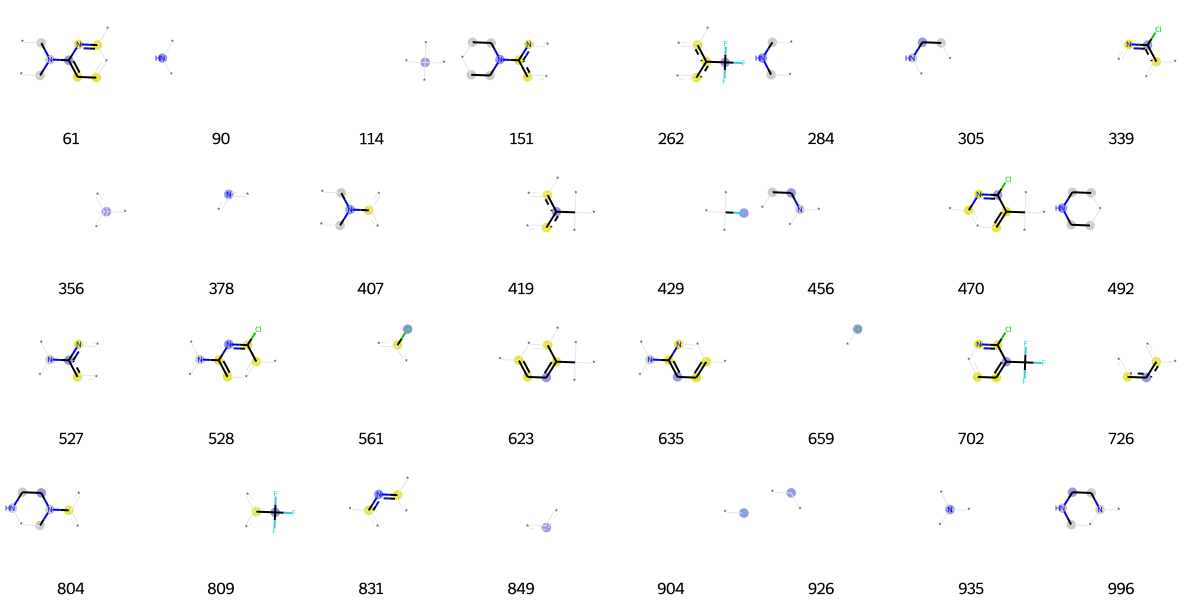

In [569]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [570]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[33,
 80,
 93,
 116,
 140,
 144,
 147,
 165,
 171,
 199,
 202,
 250,
 294,
 354,
 356,
 364,
 536,
 578,
 623,
 650,
 653,
 715,
 716,
 753,
 785,
 807,
 838,
 849,
 875,
 910,
 939,
 942,
 964]

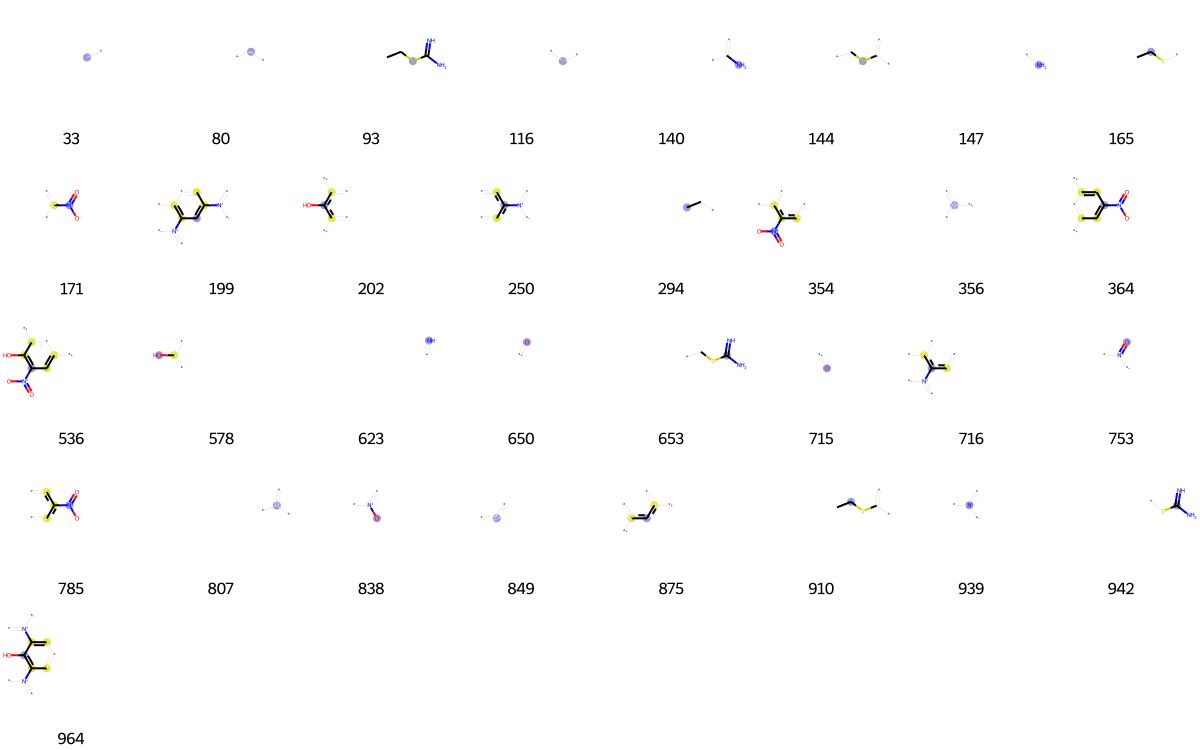

In [571]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [572]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[9,
 15,
 64,
 80,
 133,
 147,
 161,
 275,
 277,
 325,
 356,
 361,
 389,
 406,
 423,
 433,
 573,
 607,
 625,
 650,
 673,
 713,
 726,
 728,
 751,
 767,
 807,
 849,
 893,
 909,
 914,
 967]

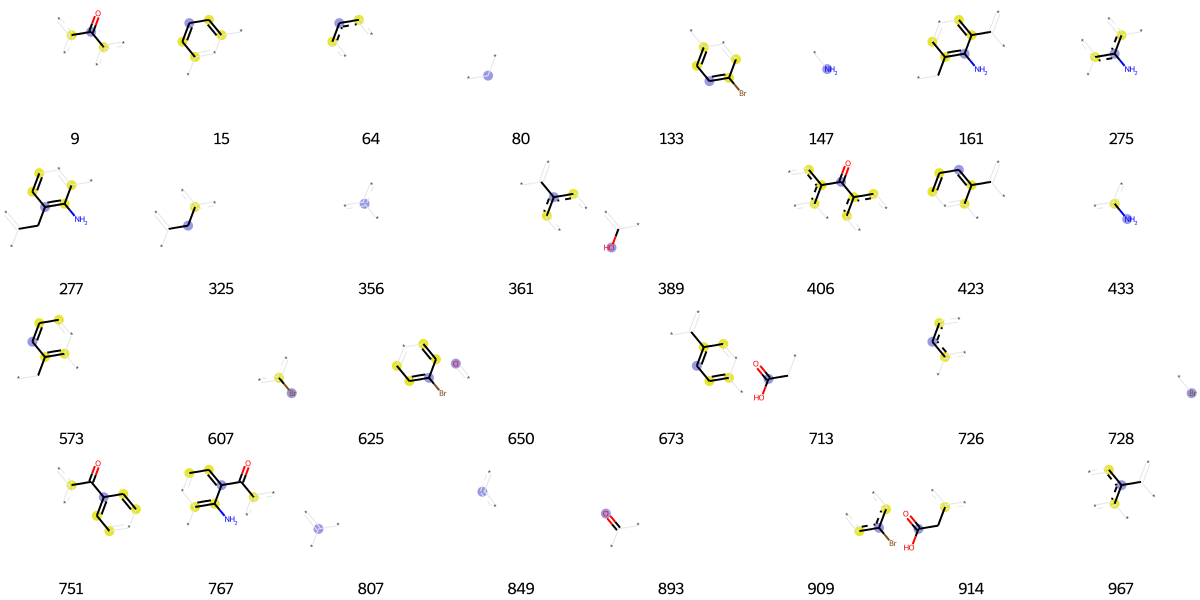

In [573]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [574]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[33,
 46,
 76,
 80,
 116,
 125,
 128,
 139,
 158,
 169,
 174,
 197,
 221,
 250,
 255,
 274,
 331,
 345,
 356,
 406,
 507,
 580,
 599,
 650,
 652,
 656,
 667,
 694,
 715,
 725,
 726,
 740,
 748,
 753,
 762,
 807,
 838,
 849,
 881,
 893,
 910,
 929,
 939,
 953,
 970]

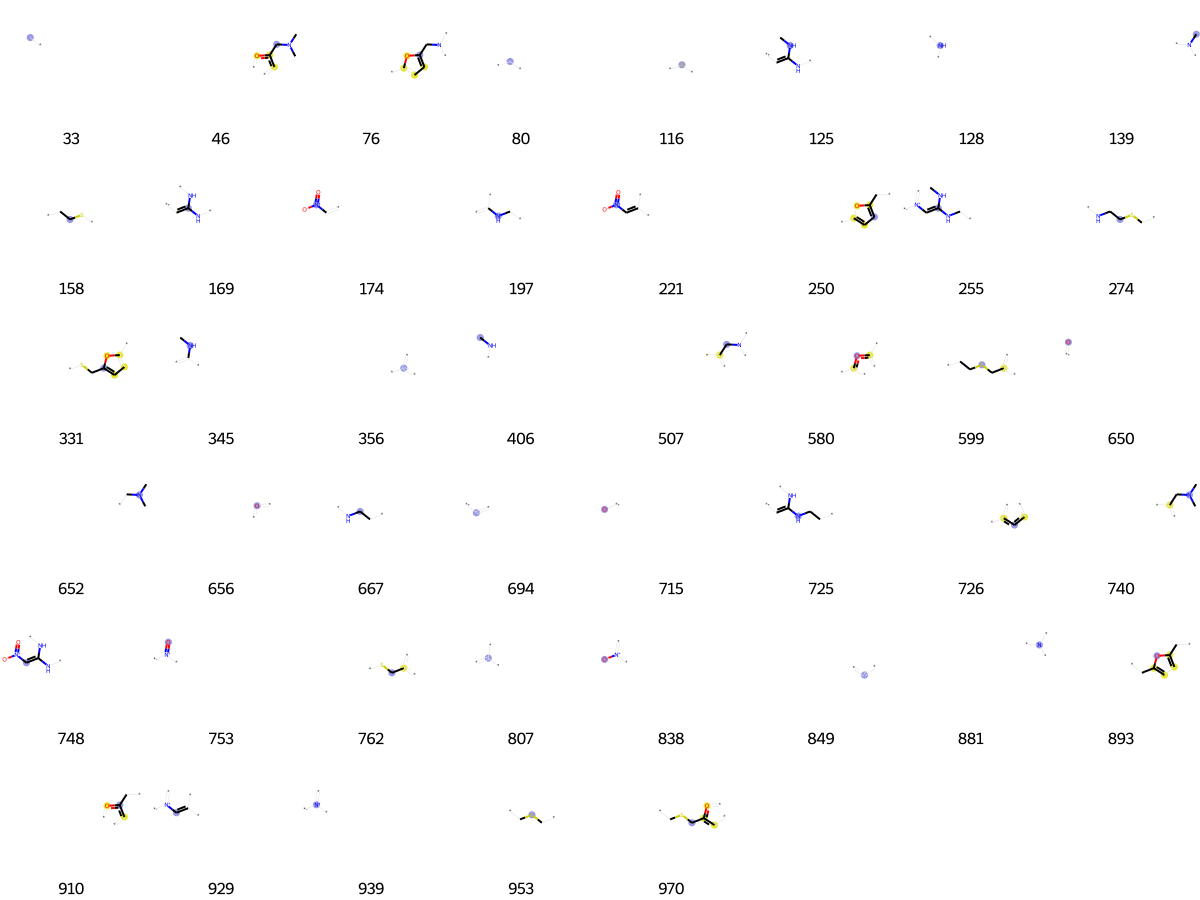

In [575]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [576]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[106,
 114,
 202,
 289,
 356,
 361,
 389,
 456,
 559,
 578,
 650,
 656,
 673,
 725,
 726,
 745,
 754,
 790,
 807,
 830,
 849,
 893,
 931]

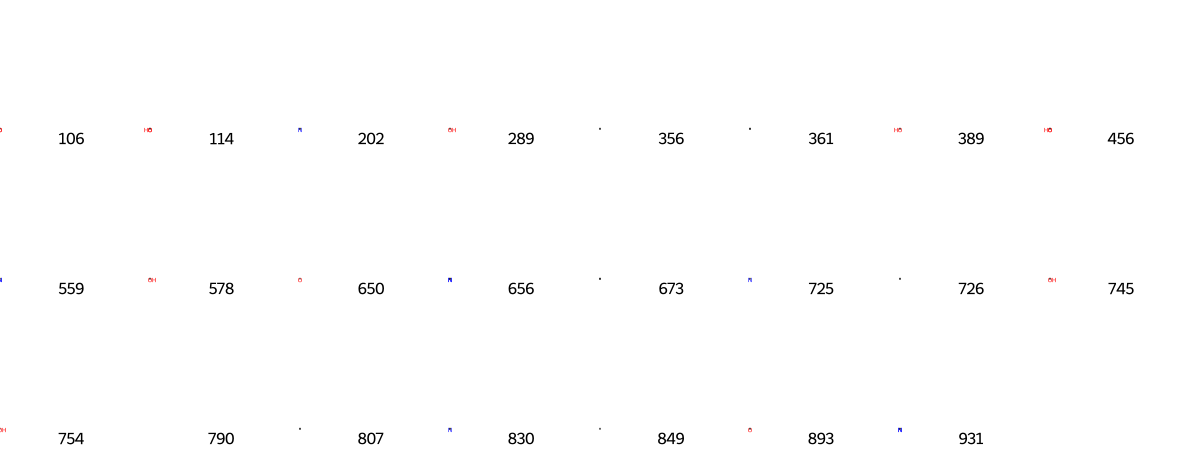

In [577]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [578]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[33, 80, 139, 252, 294, 652, 881, 932]

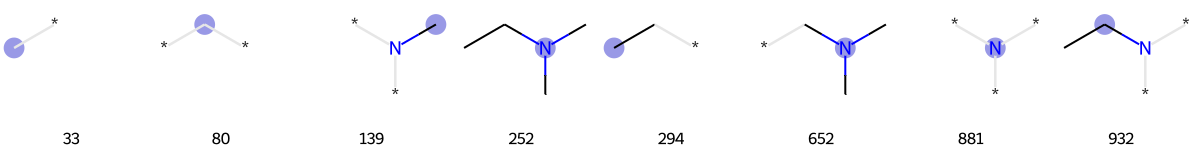

In [579]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [580]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[15,
 64,
 65,
 80,
 129,
 131,
 172,
 175,
 311,
 356,
 360,
 378,
 428,
 448,
 674,
 724,
 726,
 790,
 842,
 849,
 868,
 984]

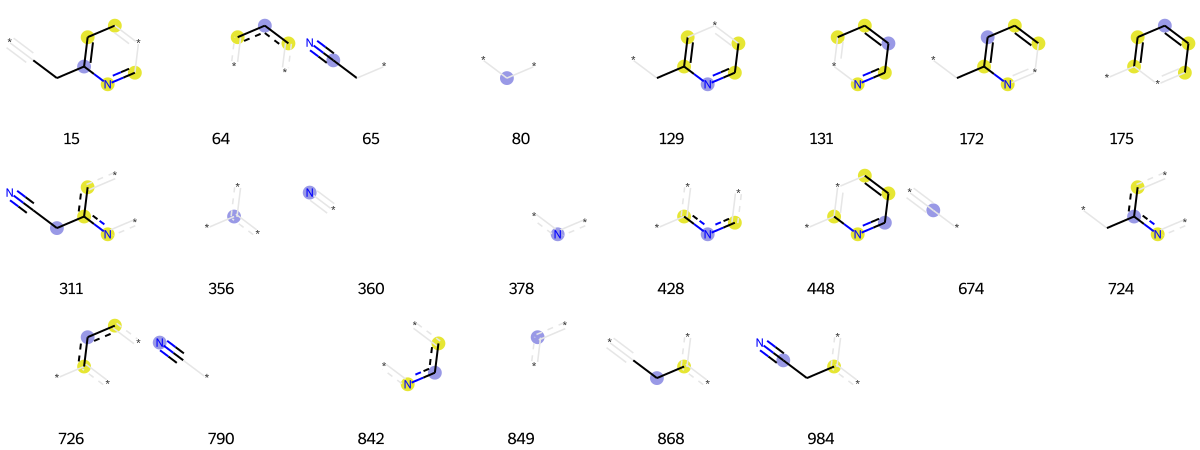

In [581]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [582]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 41,
 53,
 64,
 80,
 119,
 128,
 147,
 175,
 191,
 200,
 235,
 243,
 356,
 358,
 433,
 494,
 540,
 650,
 672,
 694,
 698,
 726,
 792,
 799,
 807,
 816,
 843,
 849,
 887,
 893,
 896,
 901,
 910,
 924,
 999]

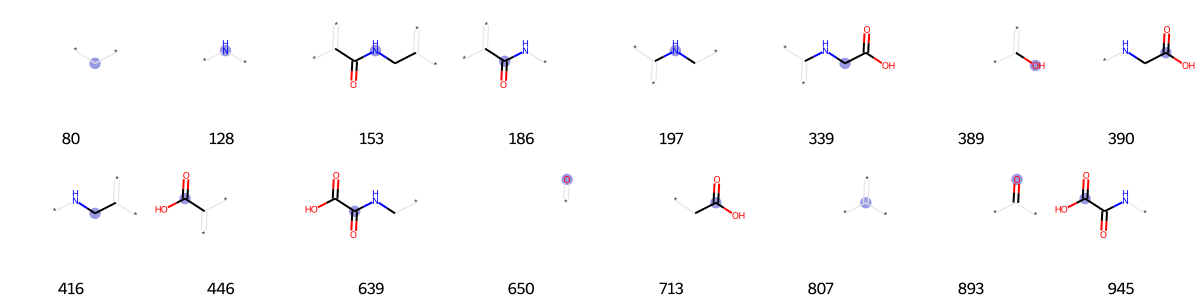

In [583]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [584]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 33,
 80,
 115,
 147,
 280,
 283,
 294,
 389,
 520,
 650,
 695,
 727,
 761,
 784,
 786,
 807,
 820,
 893]

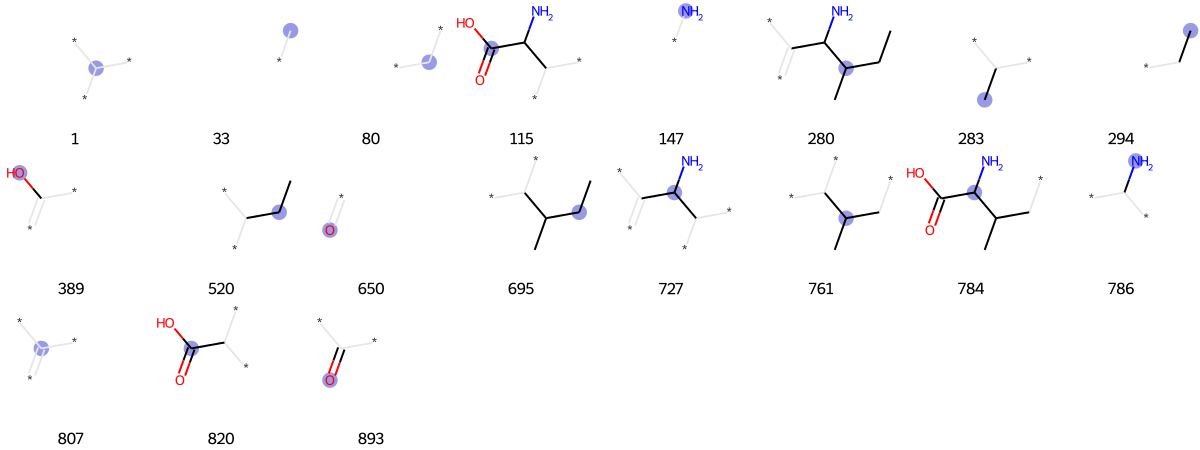

In [585]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [586]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[1,
 57,
 80,
 147,
 263,
 312,
 342,
 389,
 392,
 540,
 621,
 650,
 694,
 713,
 739,
 786,
 807,
 811,
 893,
 955,
 972]

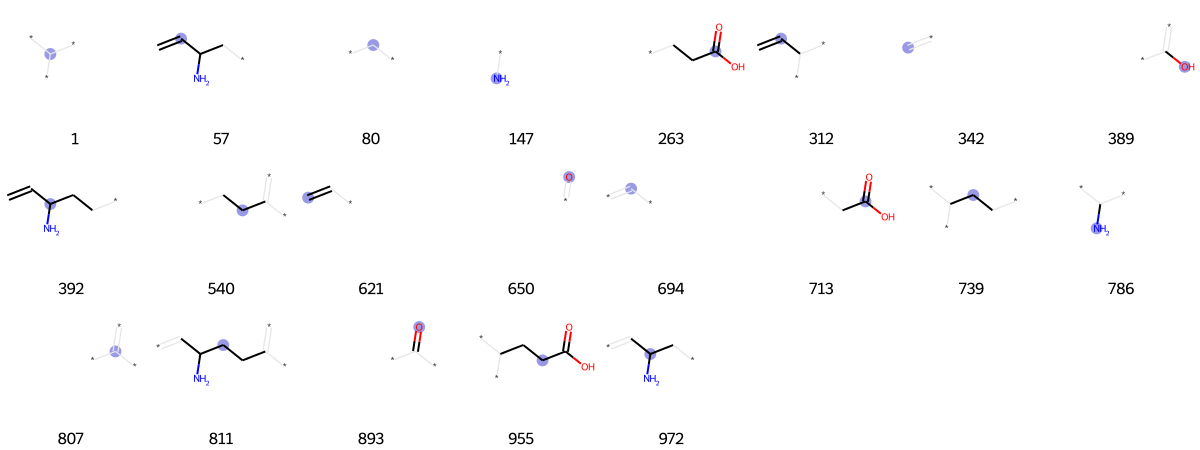

In [587]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [588]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 18,
 29,
 33,
 64,
 72,
 80,
 114,
 133,
 175,
 255,
 301,
 314,
 323,
 325,
 352,
 356,
 365,
 392,
 410,
 452,
 458,
 484,
 573,
 578,
 594,
 647,
 650,
 710,
 726,
 807,
 849,
 926,
 972,
 984,
 1019]

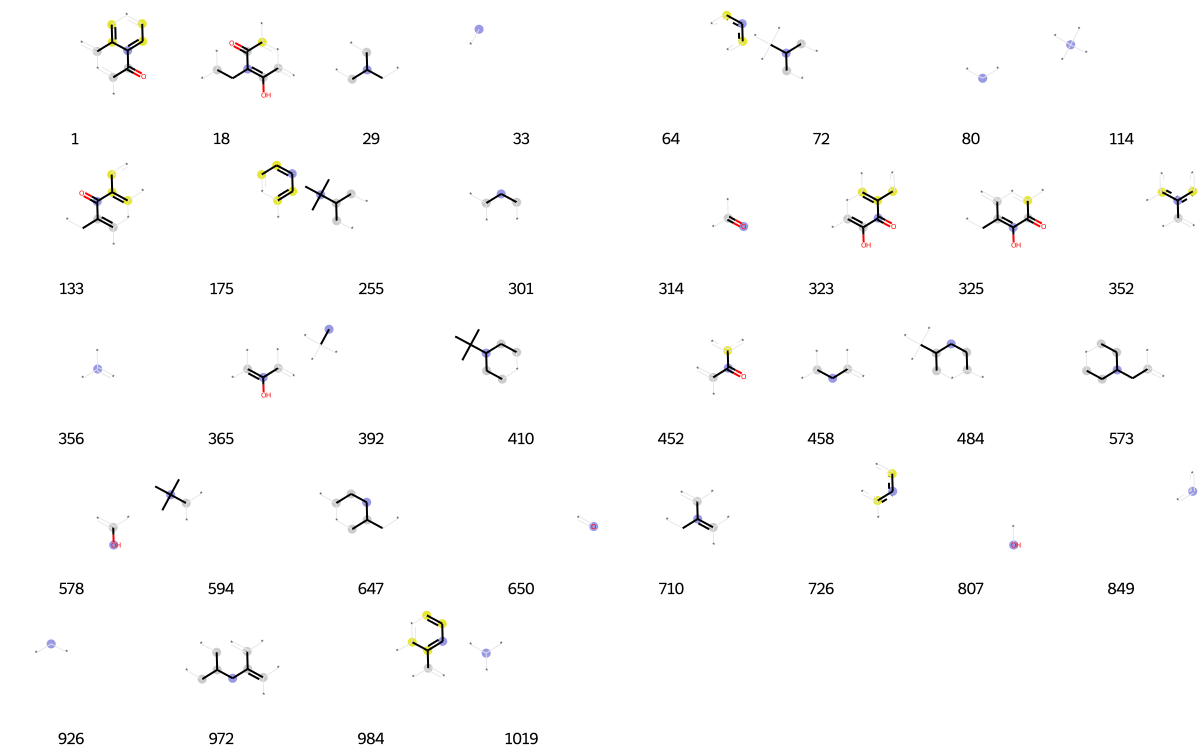

In [589]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [590]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[3,
 15,
 33,
 36,
 64,
 118,
 130,
 139,
 140,
 147,
 233,
 253,
 272,
 285,
 303,
 309,
 314,
 317,
 356,
 371,
 423,
 433,
 438,
 447,
 452,
 463,
 514,
 525,
 558,
 578,
 583,
 606,
 650,
 658,
 673,
 706,
 723,
 726,
 736,
 764,
 807,
 809,
 824,
 829,
 833,
 842,
 849,
 881,
 893,
 908,
 958,
 976,
 1005,
 1007,
 1009,
 1019]

In [591]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[10,
 33,
 34,
 64,
 66,
 77,
 80,
 111,
 175,
 294,
 318,
 334,
 348,
 356,
 367,
 375,
 378,
 387,
 428,
 429,
 431,
 441,
 457,
 458,
 484,
 588,
 623,
 656,
 726,
 750,
 842,
 849,
 851,
 881,
 899,
 926,
 935,
 1011,
 1019]

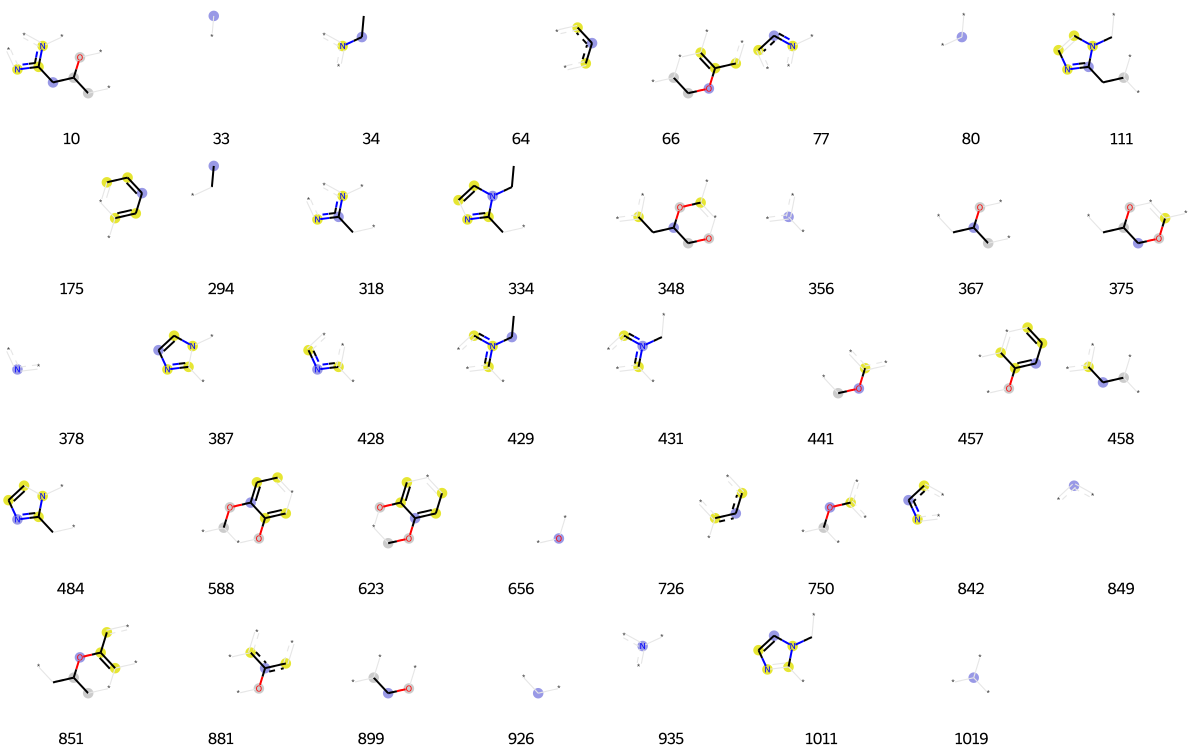

In [592]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [593]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[33,
 54,
 64,
 89,
 102,
 128,
 135,
 139,
 145,
 175,
 193,
 241,
 285,
 307,
 350,
 356,
 378,
 391,
 392,
 423,
 452,
 502,
 512,
 541,
 587,
 650,
 695,
 698,
 702,
 726,
 807,
 831,
 841,
 849,
 881,
 893,
 906,
 910,
 924,
 936,
 954,
 967,
 988,
 992]

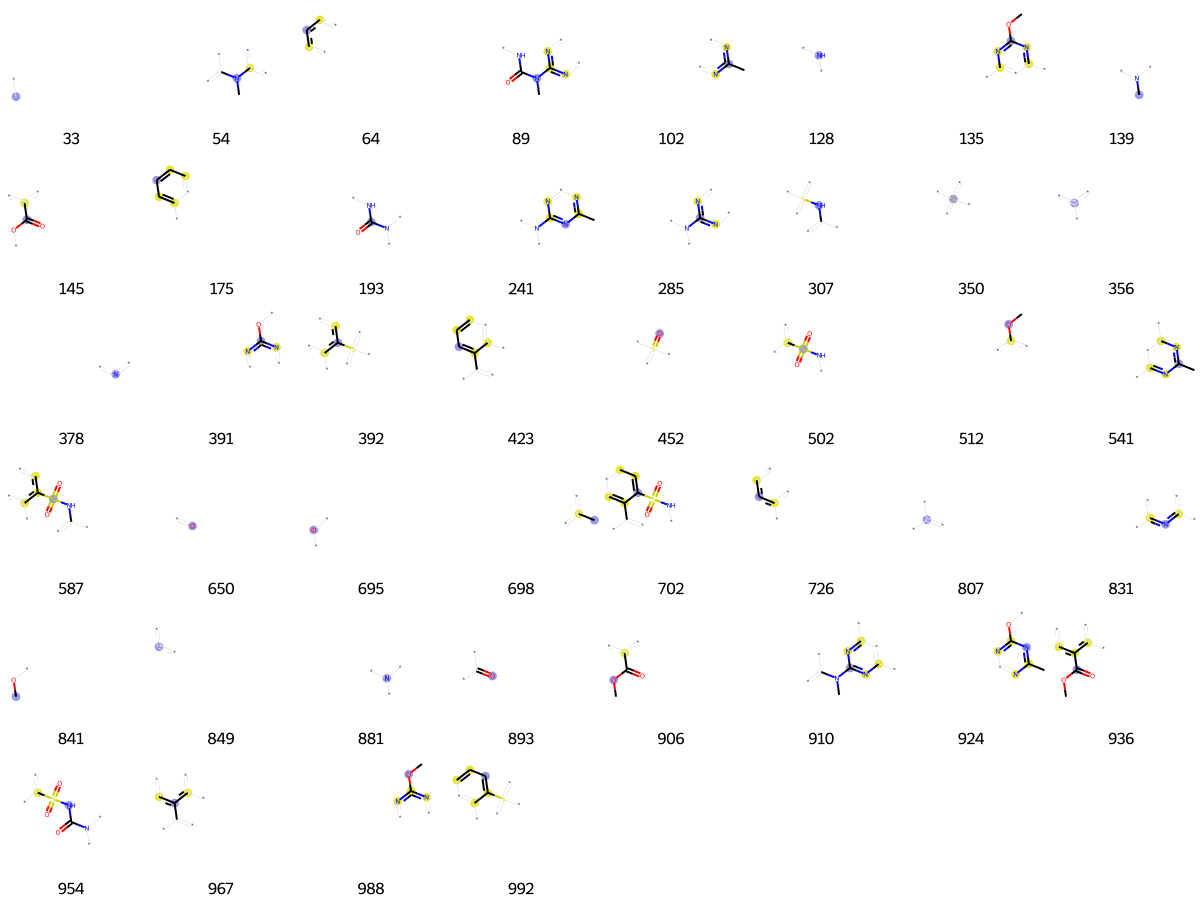

In [594]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [595]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[1,
 33,
 64,
 123,
 136,
 140,
 175,
 221,
 235,
 314,
 323,
 352,
 356,
 378,
 452,
 466,
 486,
 625,
 650,
 698,
 726,
 799,
 849,
 875,
 896,
 901,
 905,
 947,
 980,
 984]

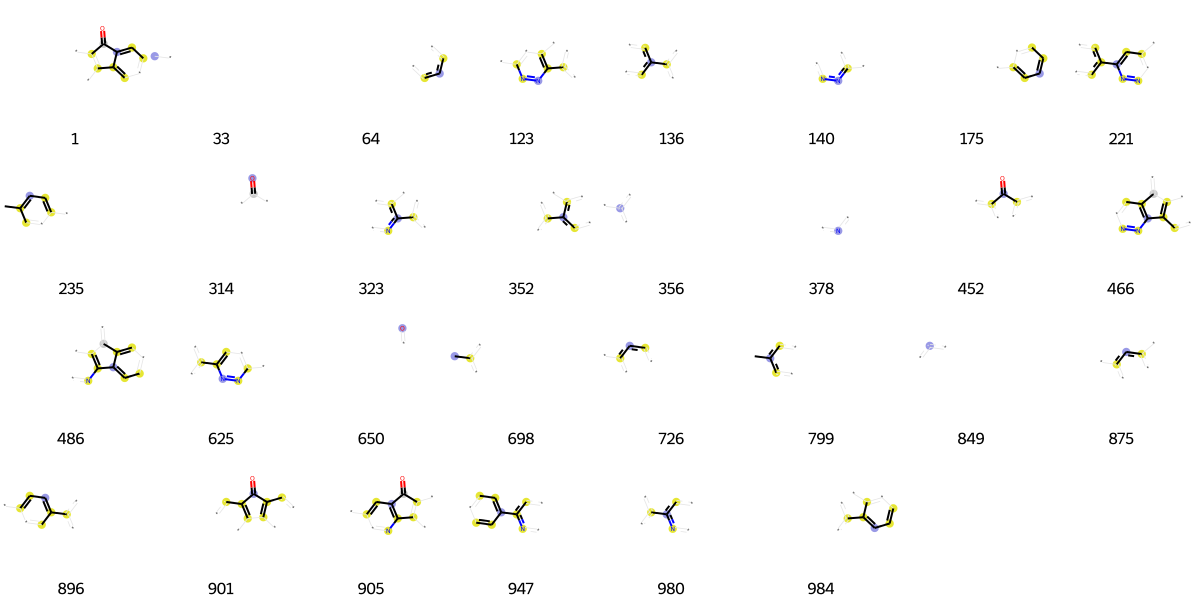

In [596]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [597]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[33,
 34,
 45,
 64,
 73,
 80,
 127,
 147,
 150,
 175,
 214,
 261,
 289,
 294,
 323,
 331,
 356,
 357,
 378,
 433,
 435,
 449,
 518,
 656,
 698,
 726,
 738,
 786,
 802,
 831,
 849,
 850,
 870,
 888,
 891,
 935]

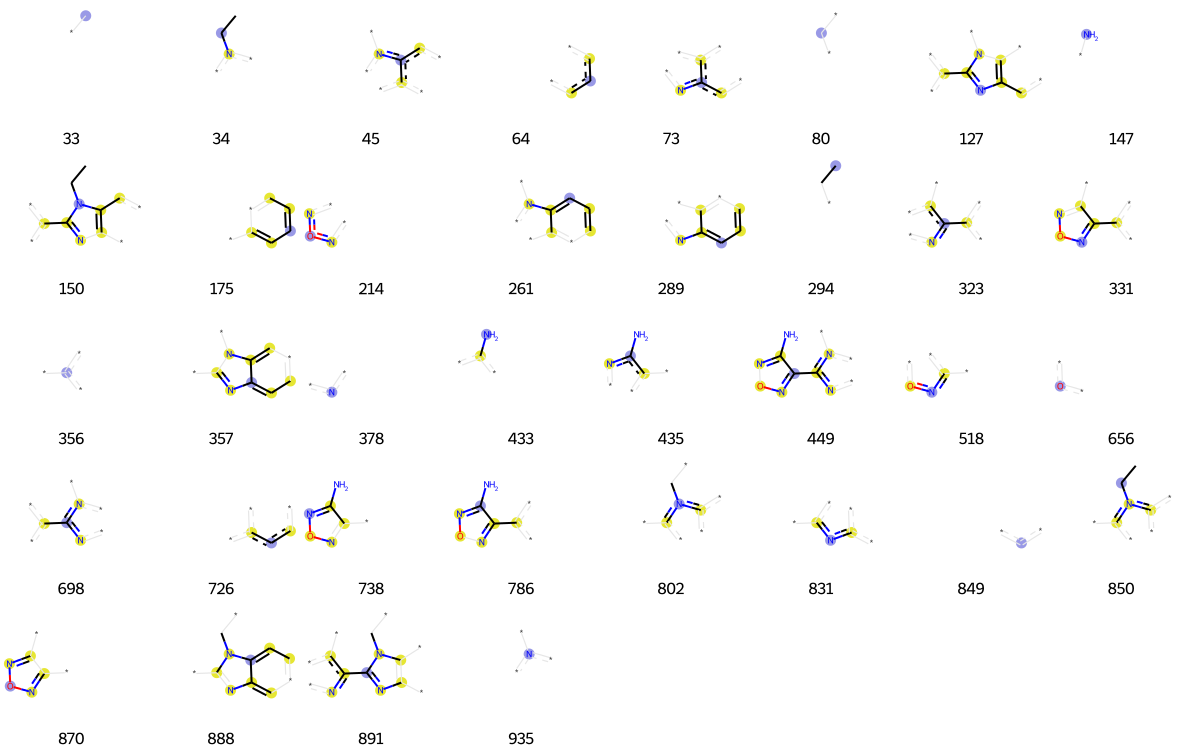

In [598]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [599]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[53,
 80,
 84,
 147,
 158,
 191,
 210,
 222,
 226,
 233,
 238,
 254,
 268,
 299,
 357,
 390,
 463,
 488,
 489,
 492,
 533,
 545,
 610,
 656,
 695,
 740,
 807,
 808,
 820,
 838,
 839,
 869,
 895,
 897,
 926,
 952,
 953,
 981,
 1019]

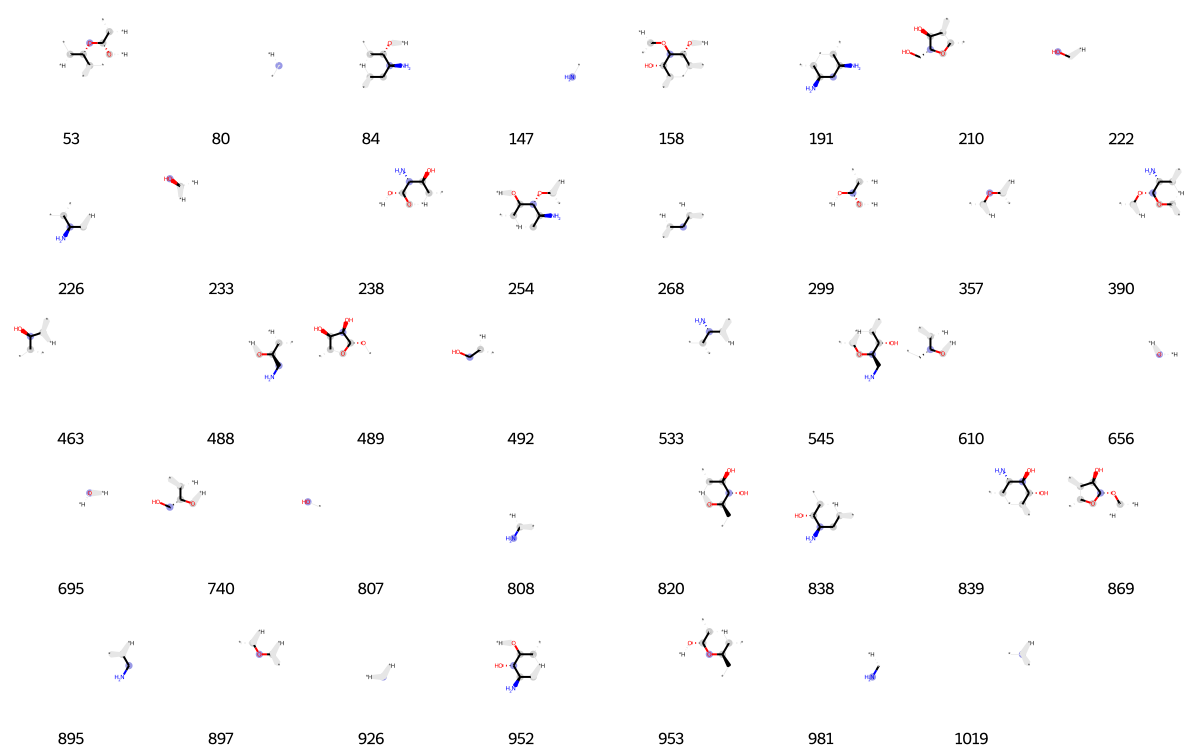

In [600]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [601]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[3,
 33,
 36,
 64,
 90,
 114,
 128,
 143,
 145,
 147,
 171,
 175,
 262,
 309,
 356,
 367,
 371,
 419,
 429,
 440,
 484,
 494,
 525,
 627,
 650,
 695,
 698,
 715,
 726,
 753,
 797,
 807,
 809,
 828,
 838,
 841,
 849,
 893,
 904,
 906,
 915,
 939,
 1005,
 1008,
 1019]

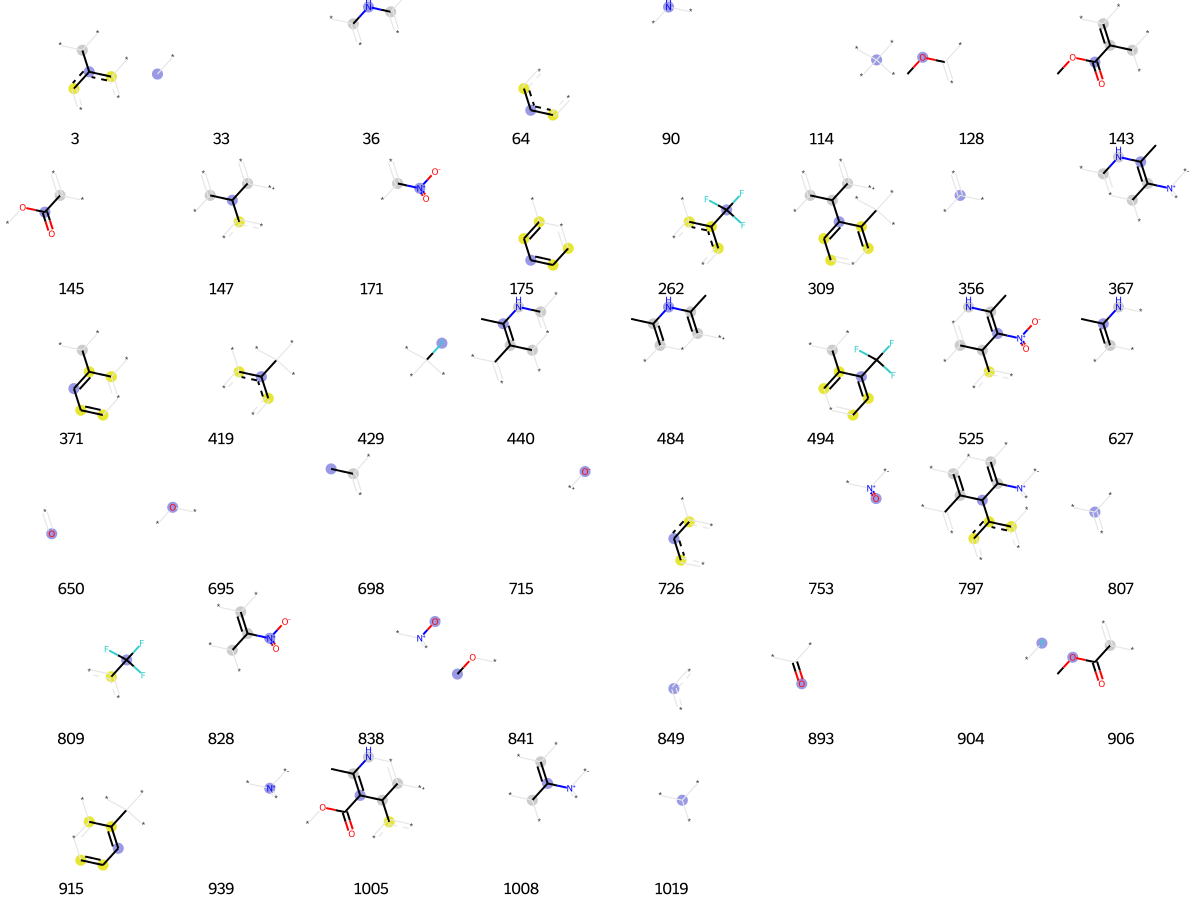

In [602]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [603]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 33,
 60,
 73,
 80,
 102,
 191,
 214,
 226,
 227,
 237,
 245,
 268,
 294,
 301,
 306,
 322,
 333,
 356,
 378,
 390,
 428,
 430,
 456,
 468,
 512,
 584,
 585,
 593,
 594,
 607,
 613,
 629,
 638,
 695,
 718,
 726,
 739,
 741,
 781,
 787,
 807,
 830,
 841,
 842,
 849,
 852,
 875,
 926,
 935,
 948,
 961,
 1019,
 1022]

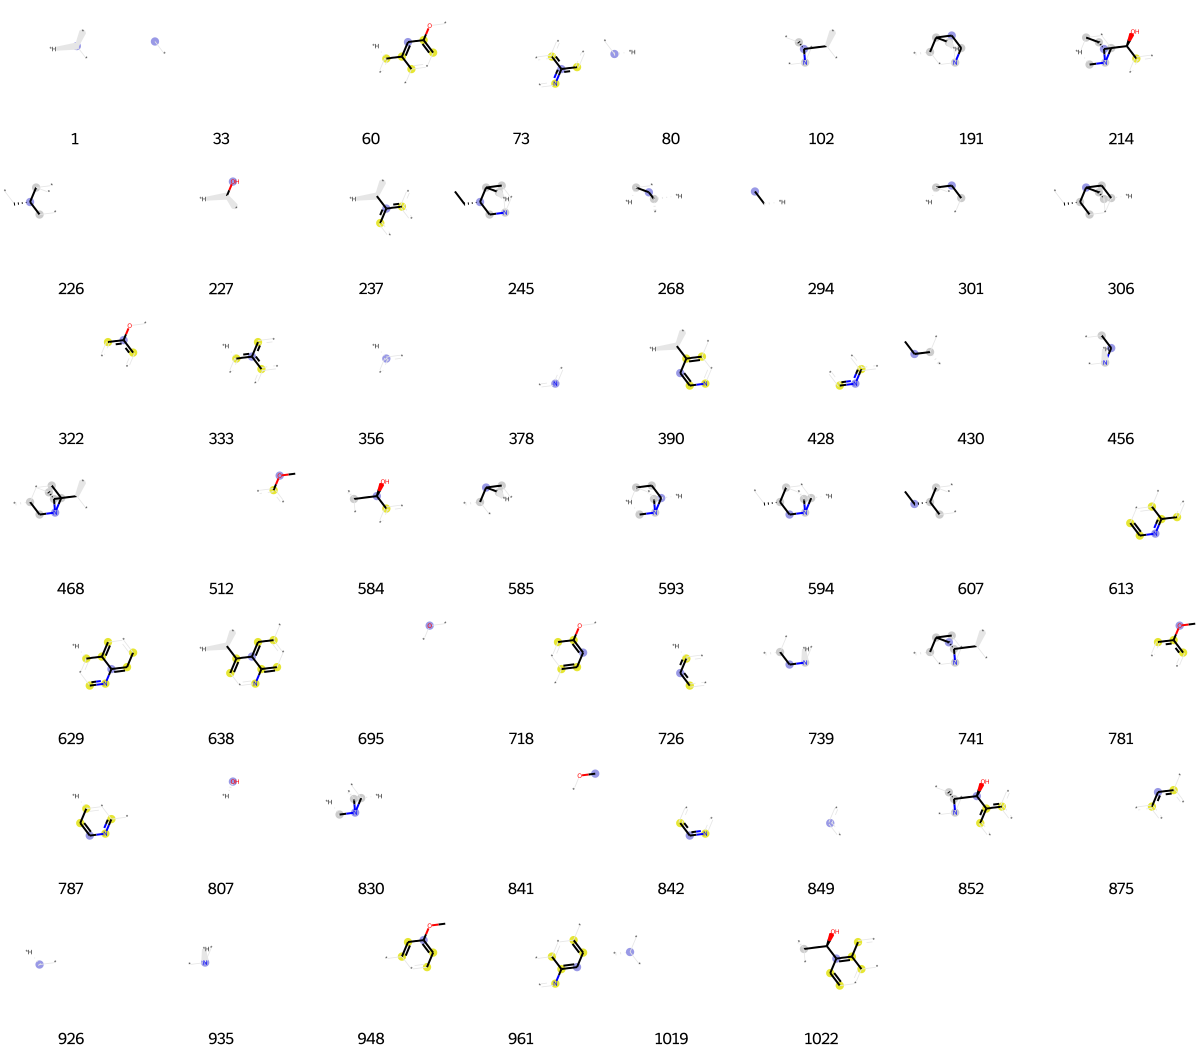

In [604]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])